<hr style="border: 1px solid black; width: 100%; margin-left: 0">


<div style="text-align:right"> <b>University of Padua - Department of Physics and Astronomy<b> </div> 
<div style="text-align:right"> <strong> Degree course: </strong> Physics of Data</div>
<div style="text-align:right"><strong>Course: </strong>Laboratory of Computational Physics<b> </div>
<div style="text-align:right"><strong>Year: </strong>2022-2023<b> </div>
<div style="text-align:right"><strong>Professor in charge: </strong> Carlo Albert<b> </div>
    

#### Students:
- Marchetti Andrea - 2089216 - andrea.marchetti.5@studenti.unipd.it
- Menti Luca       - 2069534 - luca.menti@studenti.unipd.it
- Merlin Giovanni - 2091186 - giovanni.merlin@studenti.unipd.it
- Saretto Alberto - 2063139 - alberto.saretto.1@studenti.unipd.it

    
<strong>Exam Date</strong>: 9th  of June 2023
    
<center>
    
# Time-scale correction of Be10 radio-nuclide data
<center>
<hr style="border: 1px solid black; width: 100%; margin-left: 0">   

<center>
    
## Timedeppar
<center>

To tackle the challenging high-dimensional Bayesian inference problem related to time-scale correction, we utilized the powerful MCMC sampling capabilities of the Timedeppar software. Timedeppar is a comprehensive package designed for inferring both constant and stochastic, time-dependent parameters. It enables the consideration of intrinsic stochasticity within dynamic models and facilitates the analysis of model structure modifications aimed at reducing model deficits. The underlying concept involves inferring time-dependent parameters as stochastic processes, specifically employing Ornstein-Uhlenbeck processes. Timedeppar allows for simultaneous inference of constant model parameters and parameters associated with Ornstein-Uhlenbeck processes. Additionally, the package includes convenient functions for sampling from and calculating densities of Ornstein-Uhlenbeck processes. ( Link to the source $\rightarrow$  https://cran.r-project.org/web/packages/timedeppar/timedeppar.pdf)

<center>

## Analysis of Synthetic Dataset
<center>

In this section, we thoroughly assess the performance of our Timedeppar software implementation by conducting comprehensive parameter inference. Specifically, we delve into the inference of the $\mu$, $\sigma$, and $\gamma = \frac{1}{\tau}$ parameters associated with Ornstein-Uhlenbeck processes, as well as the amplitude $A$, phase $\phi$ and $\sigma_{y}$ parameters. To achieve this, we leveraged three synthetic datasets, each consisting of a single cycle with equidistant temporal sequences, to which distinct signals were superimposed. These signals include a random signal in the first dataset, a sinusoidal signal in the second dataset, and a ramp function signal in the third dataset.


    
### Model implementation


In order to infer the parameters we have defined the related priors. In particular we have considered:


- a gaussian distribution $N(x; \mu, \sigma^2) = \frac{1}{Z}$ $\cdot exp \left( −\frac{1}{2} \left(\frac{x- \mu}{\sigma} \right)^2 \right) $, with $Z=\sqrt{2\pi} \sigma $ , for $\mu_{\xi}$, $A$, $\phi$ parameters;

- a uniform gamma distribution $Gamma(\alpha, \lambda) =\frac{1}{\Gamma(\alpha)} \cdot x^{\alpha-1} \cdot \lambda^{\alpha} \cdot e^{- \lambda x}$, with $x \ge 0$, for $\sigma_{\xi}$ and $\sigma_{y}$ parameter;

- A uniform distribution for $\gamma$ 



As concerned the input values for the used priors we have considered:
-  $\mu=1$ and $\sigma=0.1$ for $\mu_{xi}$;
-  $\mu=10$ and $\sigma=1$ for $A$;
-  $\mu=2$ and $\sigma=0.1$ for $\phi$;
- $\alpha=1$ and $\lambda=1$ for $\sigma$.

The implementation of R code for Bayesian inference with Timedeppar is divided in three main packages:

- <strong>Variables</strong> which contains general definitions for global variables and import the main datasets
- <strong>Timedeppar</strong> in which likelihoods and priors are defined and the Bayesian inference implemented.
- <strong>Visualization</strong> for defining useful functions so to visualize results in an efficient way

In [340]:
source('LCP_Project/Timedeppar/Variables_syn.r')
source('LCP_Project/Timedeppar/Timedeppar_syn.r')
source('LCP_Project/Timedeppar/Visualization_syn.r')

Installing package into ‘/home/alberto/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/alberto/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



We report as an example the inference performed for the second timeseries in which a sinusoidal signal is superimposed to the timeries.

infer.timedeppar (timedeppar 1.0.2 2022-05-24): starting new Markov Chain

  number of constant parameters:          3

  number of time-dependent parameters:    1

  number of estimated process parameters: 3

150000 iterations completed

  acceptance frequency of constant parameters:             0.149

  acceptance frequencies of time-dependent parameters:     0.00243

  acceptance frequencies of Ornstein-Uhlenbeck parameters: 0.159



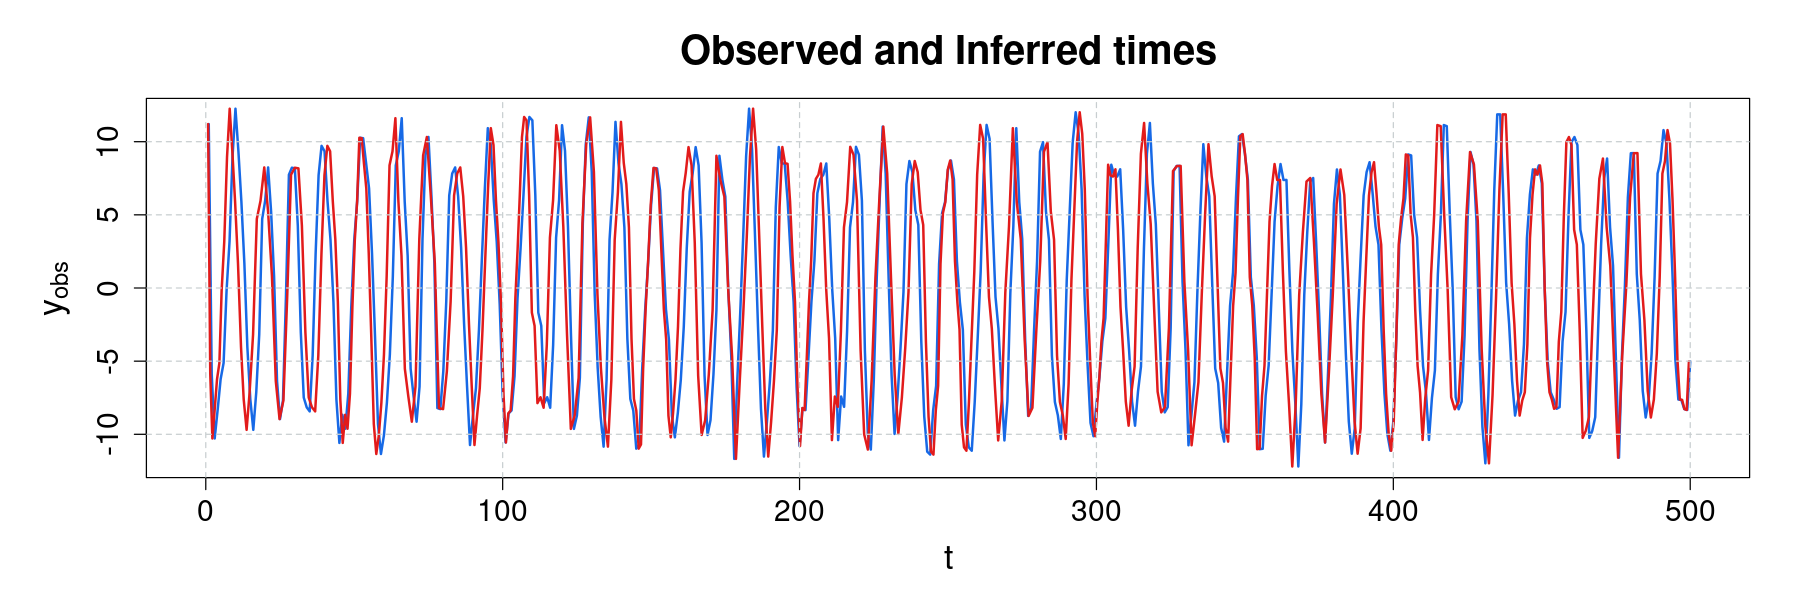

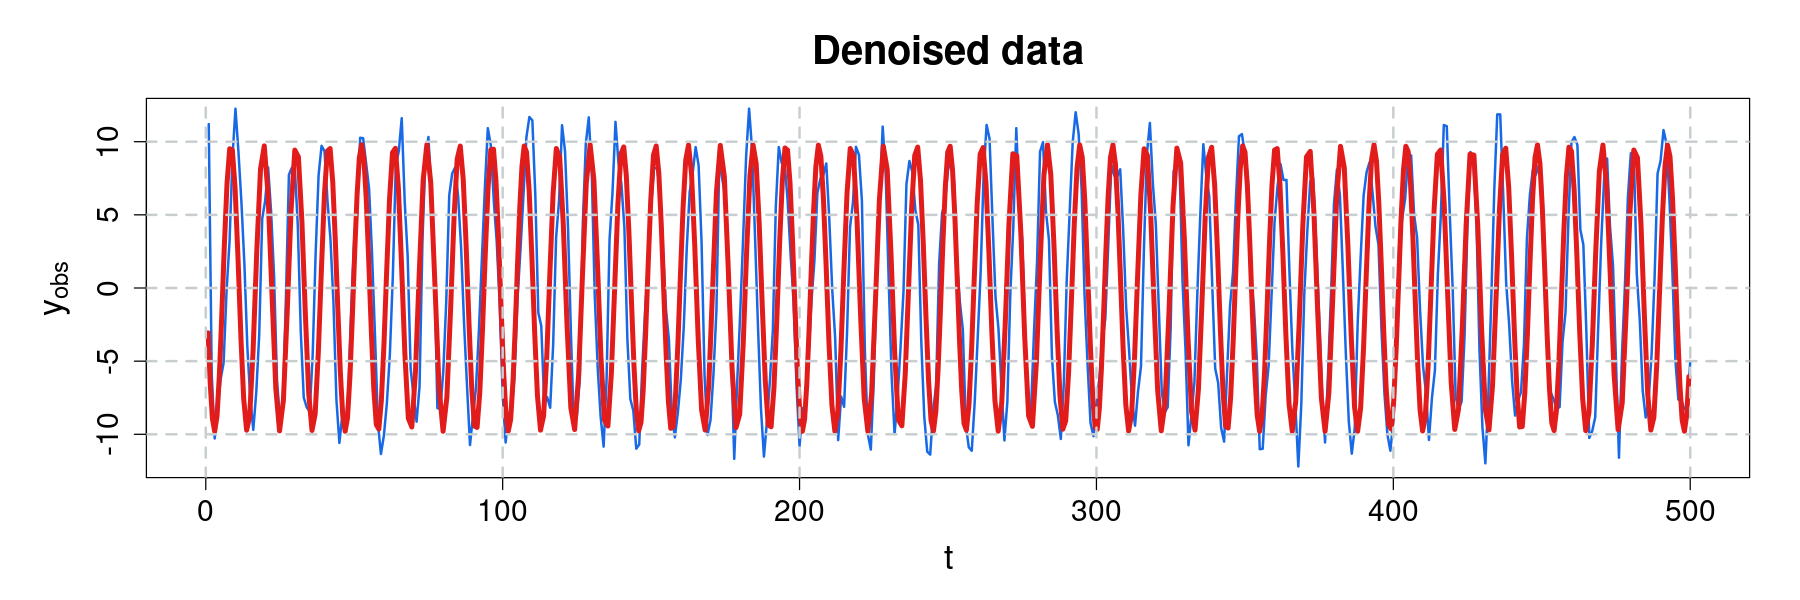

In [198]:
inf2 <- inference("Series2", "Series_2")

<center>

## Results
<center>

In [331]:
inf2_df <- inf2$df
inf2_df_inf <- inf2$df_inf[]
inf2_par_inf <- inf2$par_inf

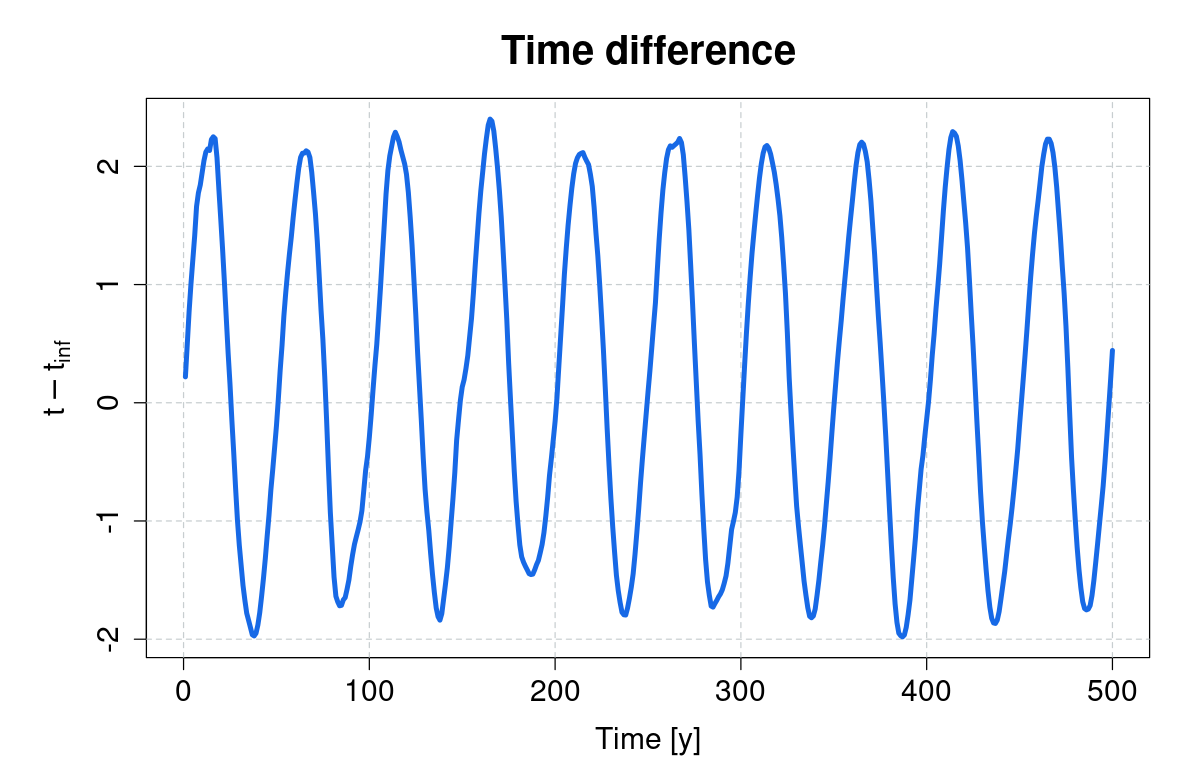

NULL

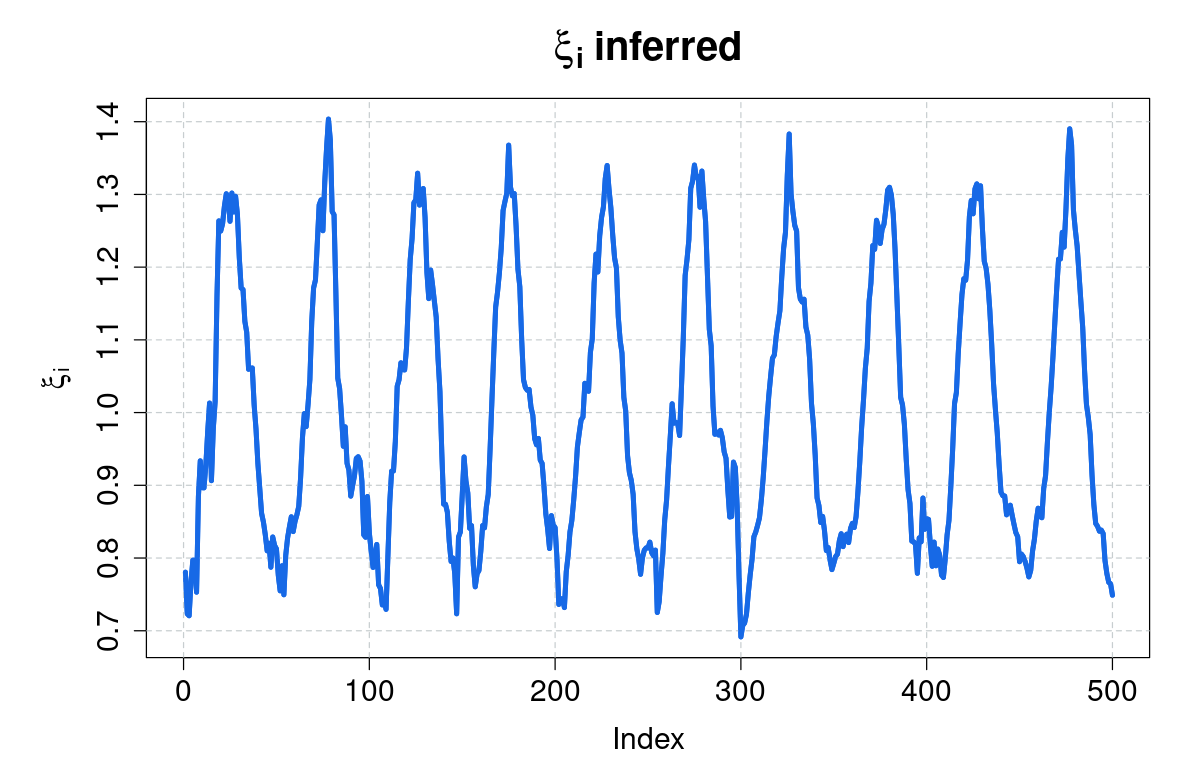

In [330]:
plot_diff(inf2_df)

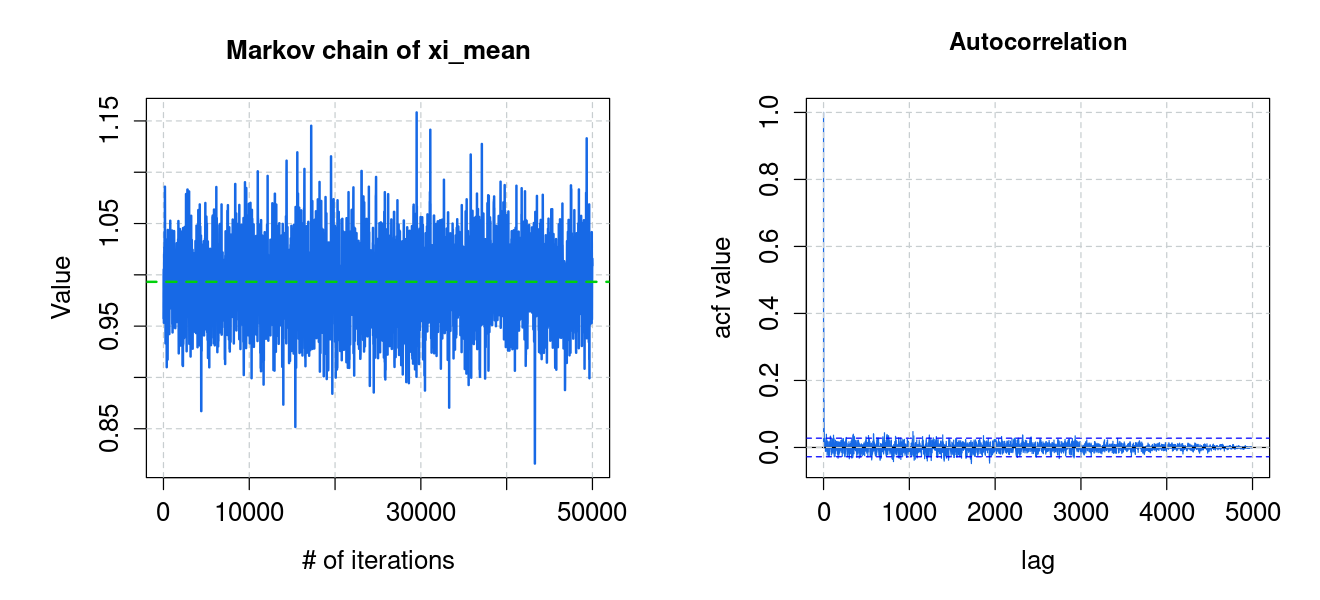

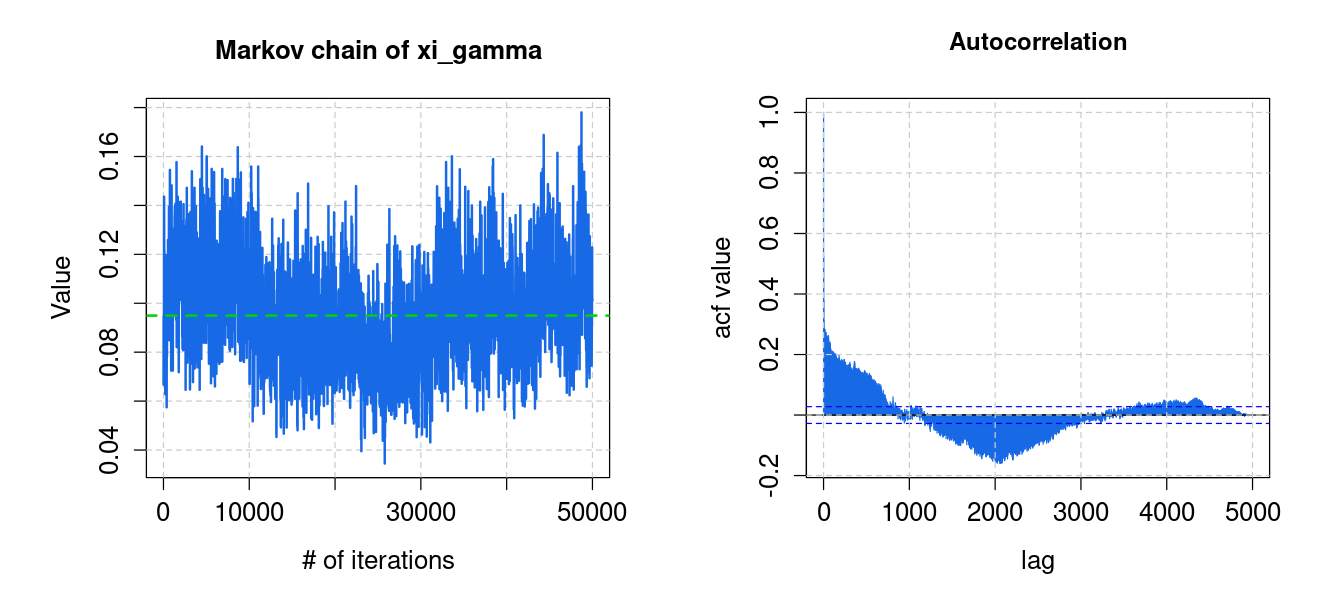

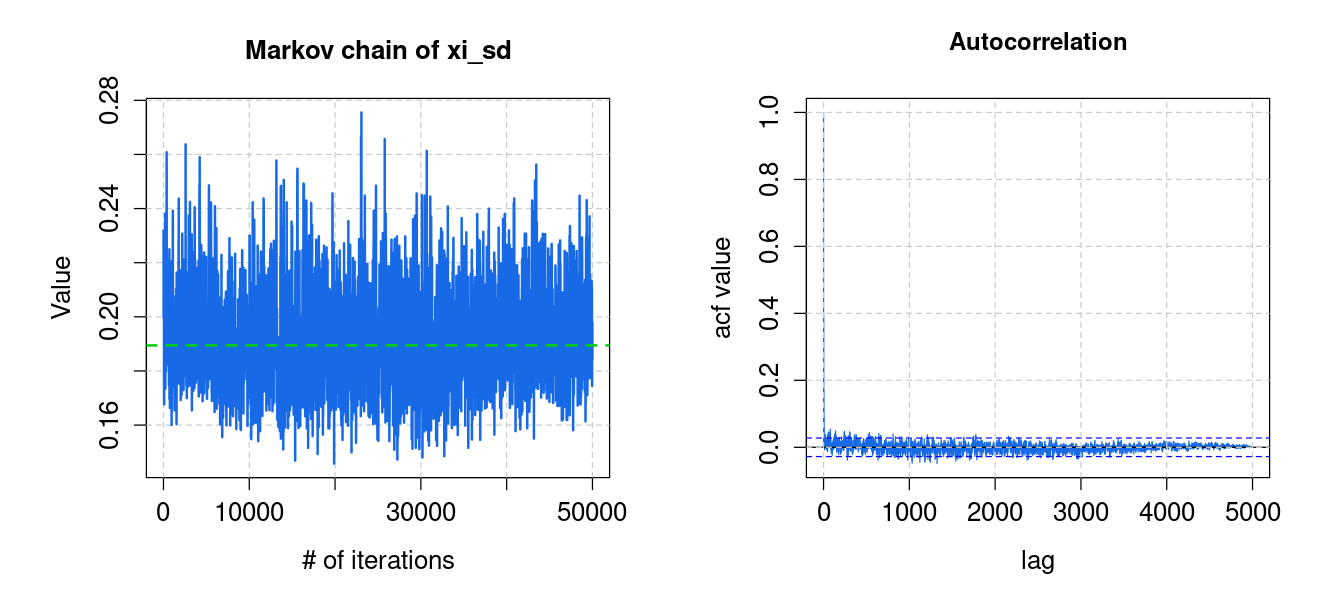

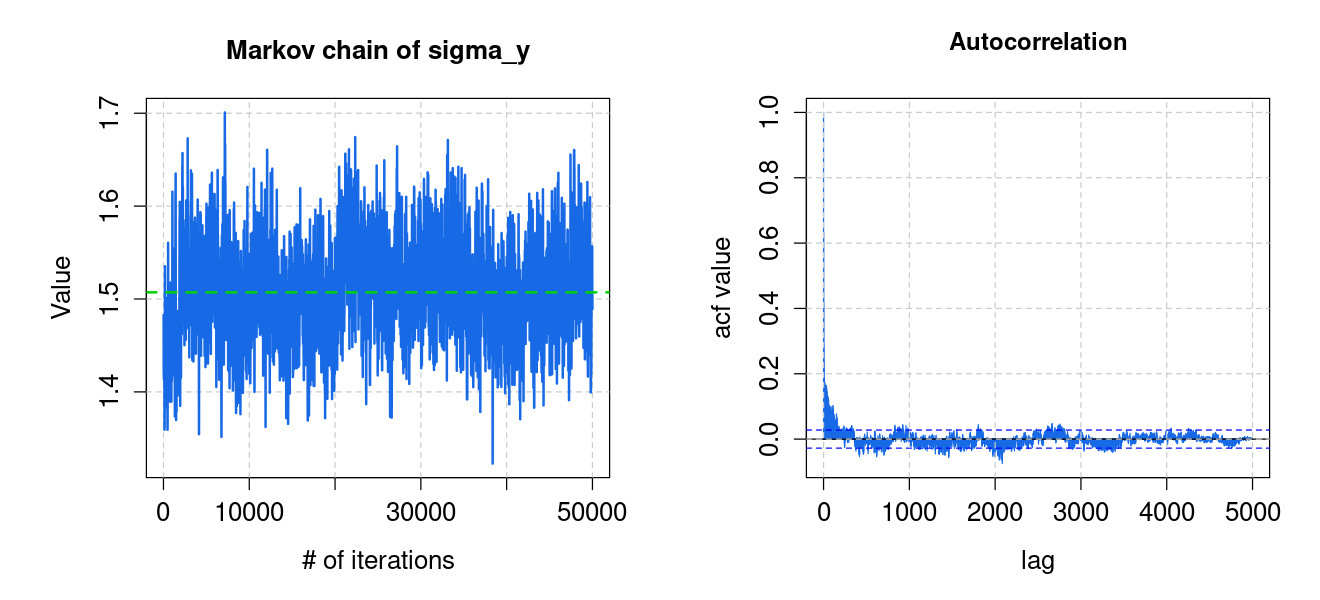

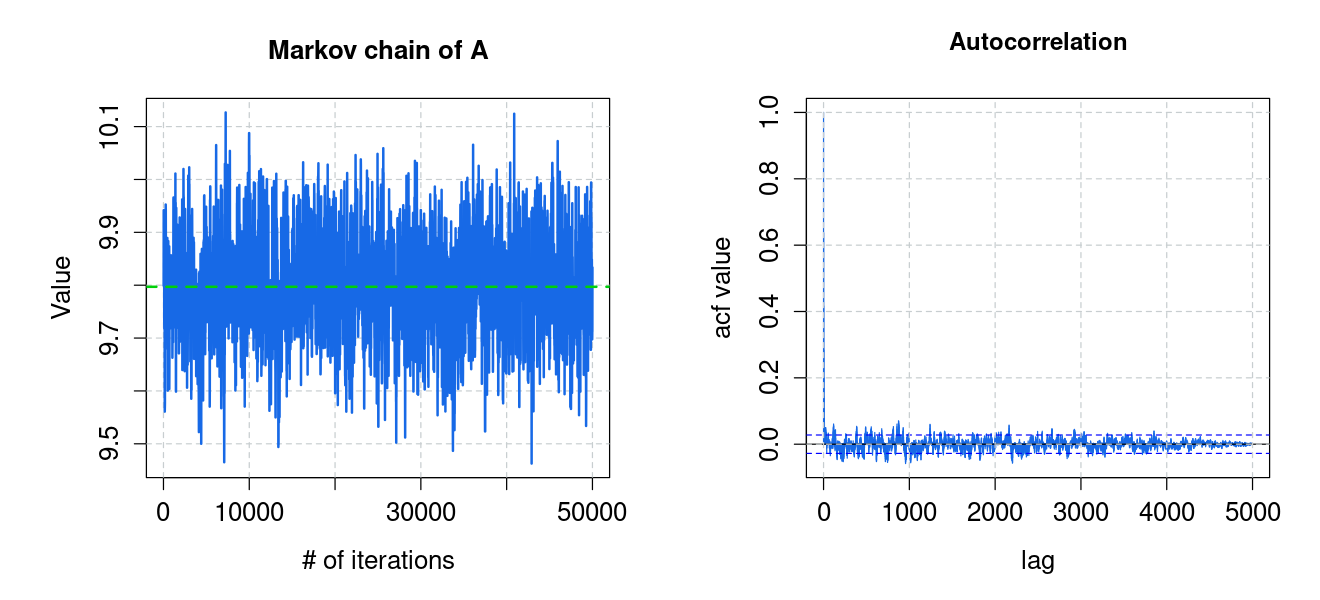

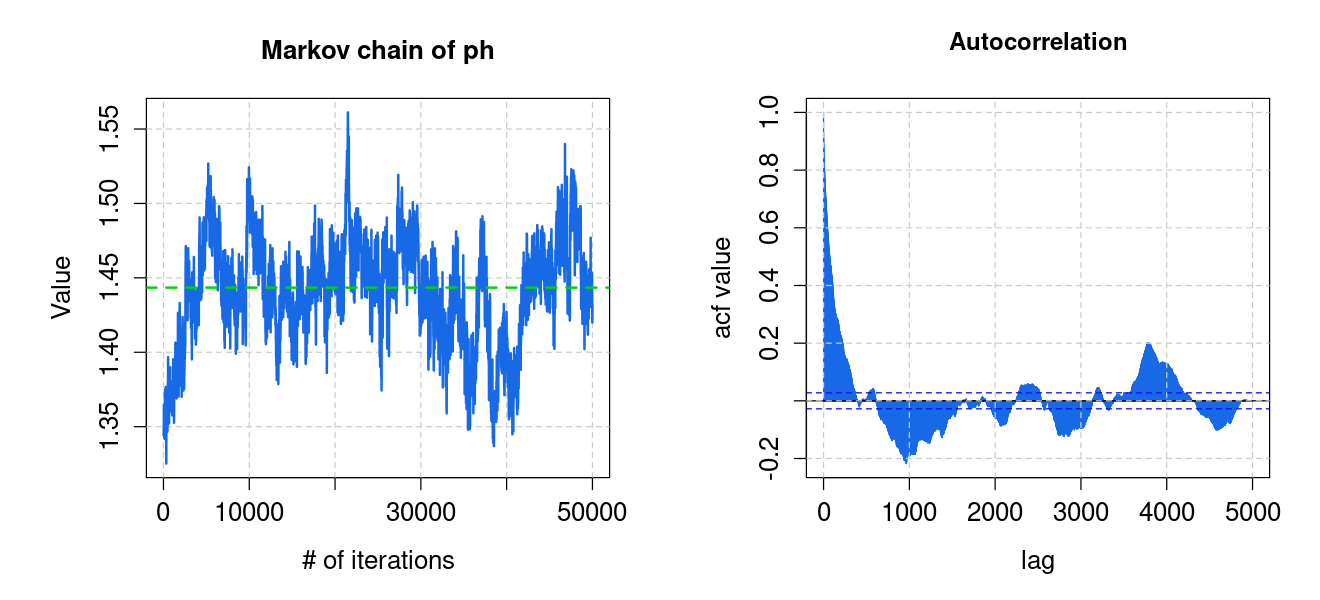

In [341]:
plot_chain_acf(inf2_df_inf)

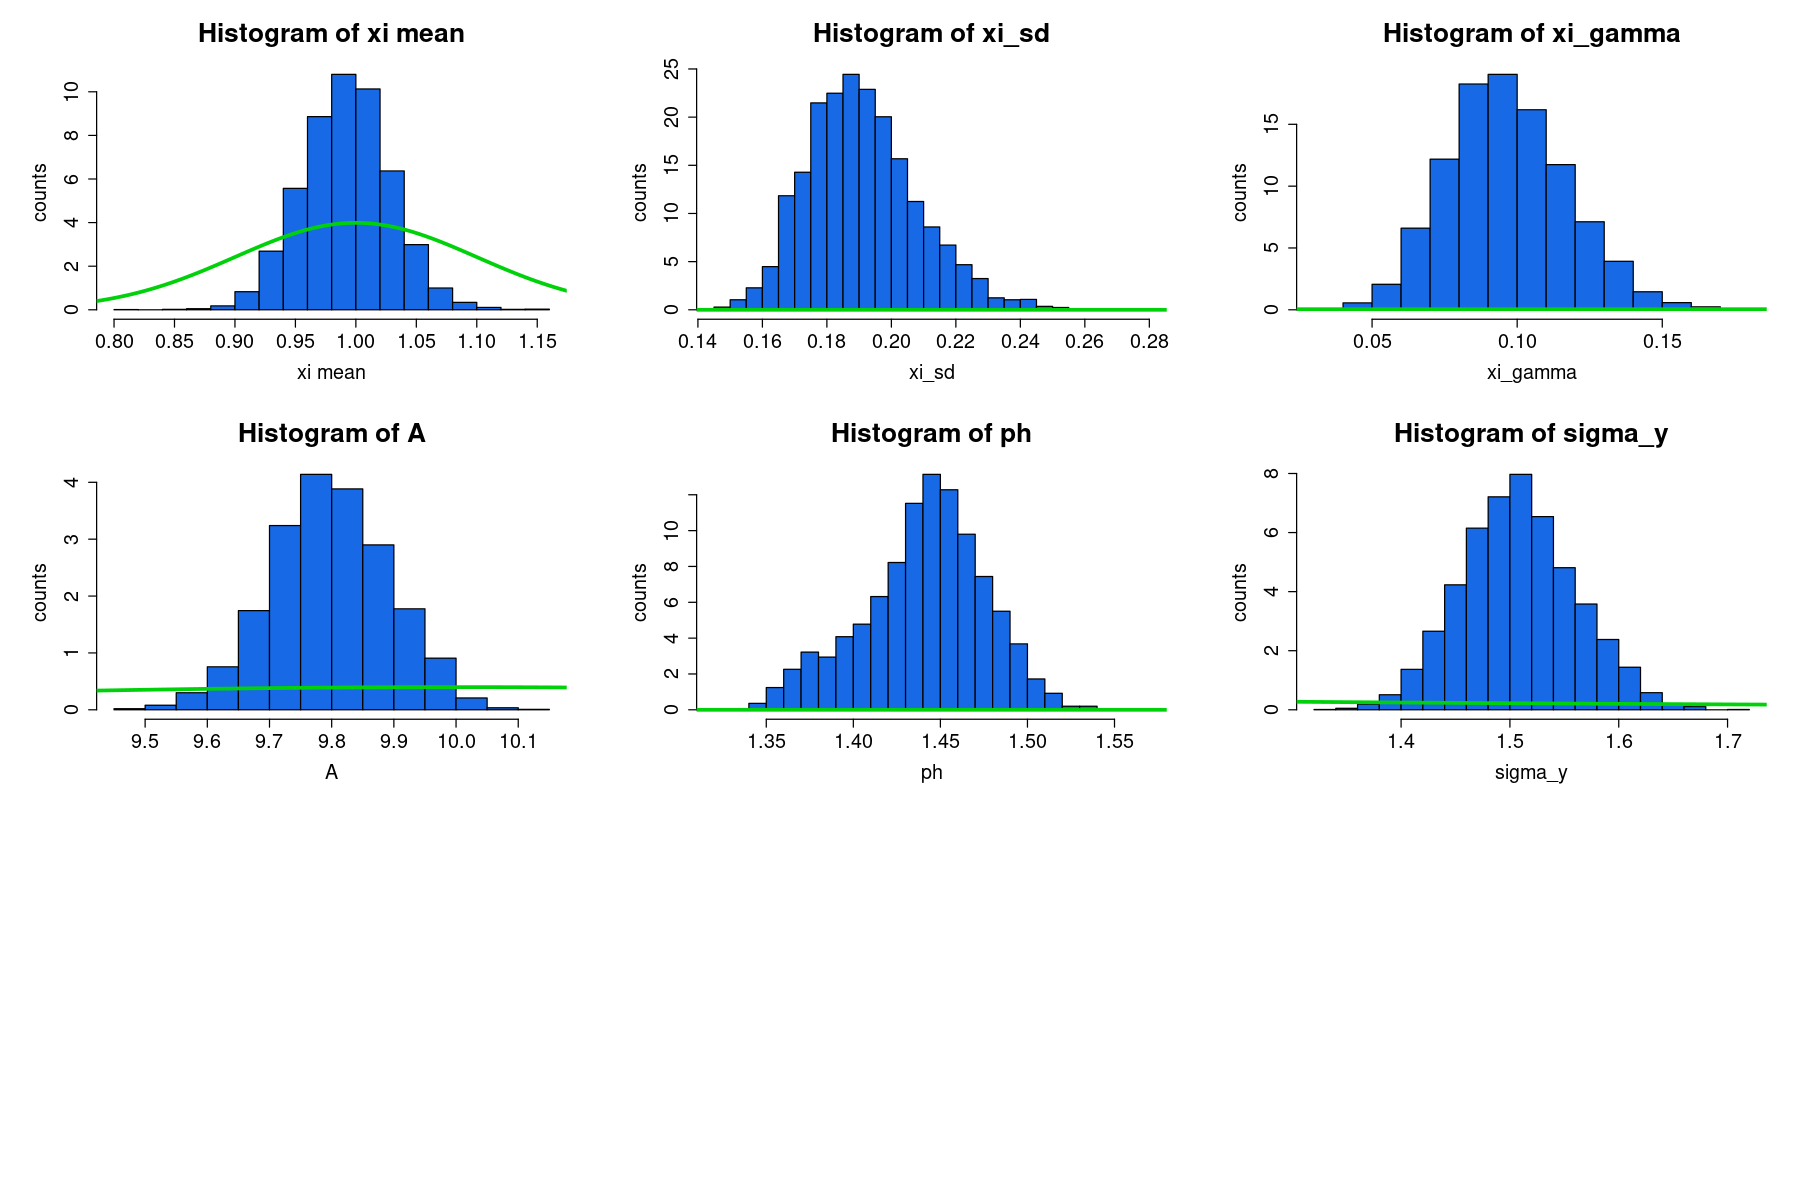

In [339]:
plot_hist(inf2)

<center>

## Analysis of Real Dataset
<center>

In this section, we perform the time-correction for the dataset of interest based on $^{10}Be$ concentration measurements. In order to do that the main cycles for the dataset have been considered as a reference. Moreover the periods of such cycles have been compared to the ones related to $^{14}C$ cycles, substituting the former with the latter when an agreement between the two was found. Such periods have then fixed and then do not take part into the inference. The amplitudes and phases are instead considered for all of the cycles with fixed and variable period.

### Model implementation

In order to infer the parameters we have defined the related priors. In particular we have considered:


- a normal distribution for $\mu_{\xi}$, $A_i$, $\phi_i$ and $f_i$ parameters;

- a uniform gamma distribution for $\sigma_{\xi}$ and $\sigma_{y}$ and $\gamma$ parameter;
 
 
As concerned the input values for the used priors we have considered:
-  For constant parameters such as $A_i$, $ph_i$ and $freq_i$ priors have been centered in the reference value and a deviations of the $20\%$ was considered;
-  OU parameters priors have been set considering the initial timestamps from the observed dataset;
- $\alpha=1$ and $\lambda=1$ for $\sigma$.

In [313]:
source('LCP_Project/Timedeppar/Variables_Be.r')
source('LCP_Project/Timedeppar/Visualization_Be.r')
source('LCP_Project/Timedeppar/Timedeppar_Be.r')

Installing package into ‘/home/alberto/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/alberto/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



infer.timedeppar (timedeppar 1.0.2 2022-05-24): starting new Markov Chain

  number of constant parameters:          20

  number of time-dependent parameters:    1

  number of estimated process parameters: 3

4e+05 iterations completed

  acceptance frequency of constant parameters:             0.265

  acceptance frequencies of time-dependent parameters:     0.0133

  acceptance frequencies of Ornstein-Uhlenbeck parameters: 0.199



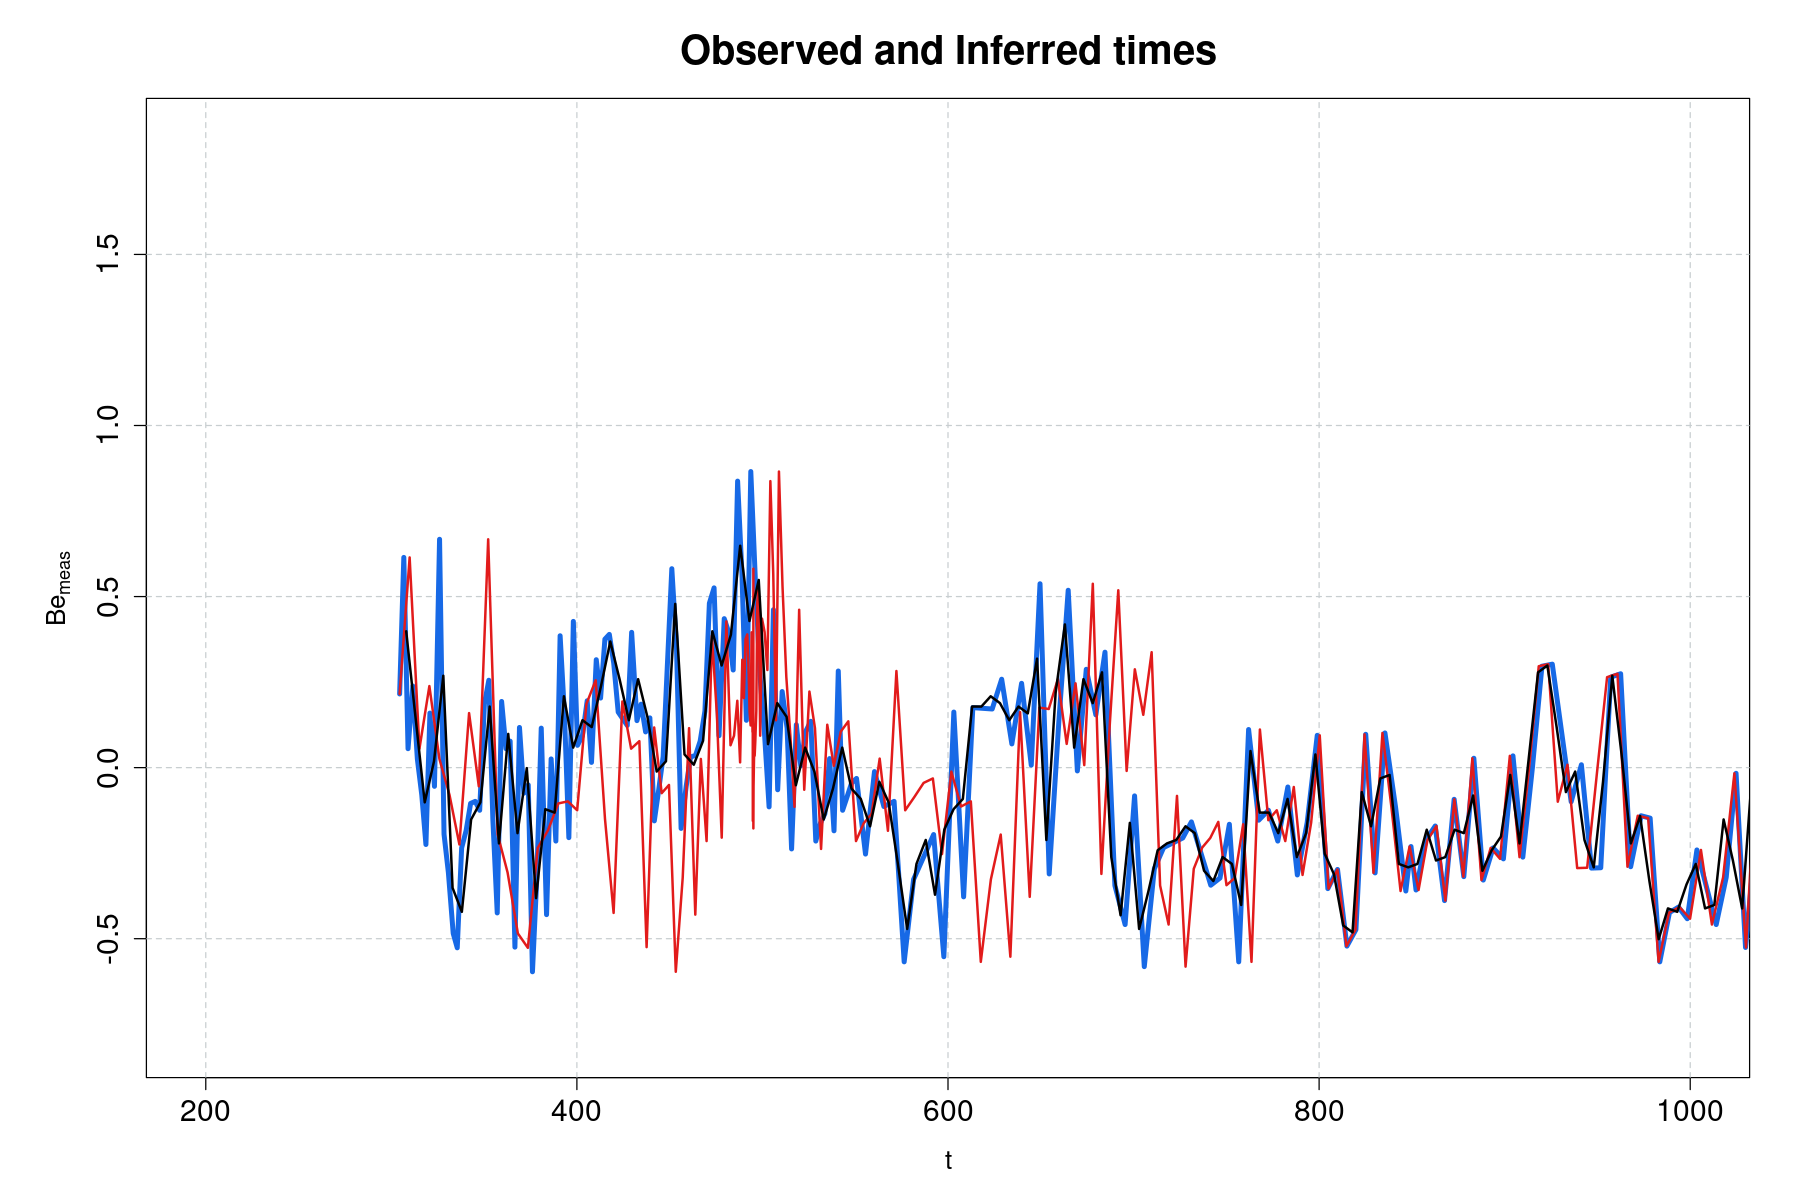

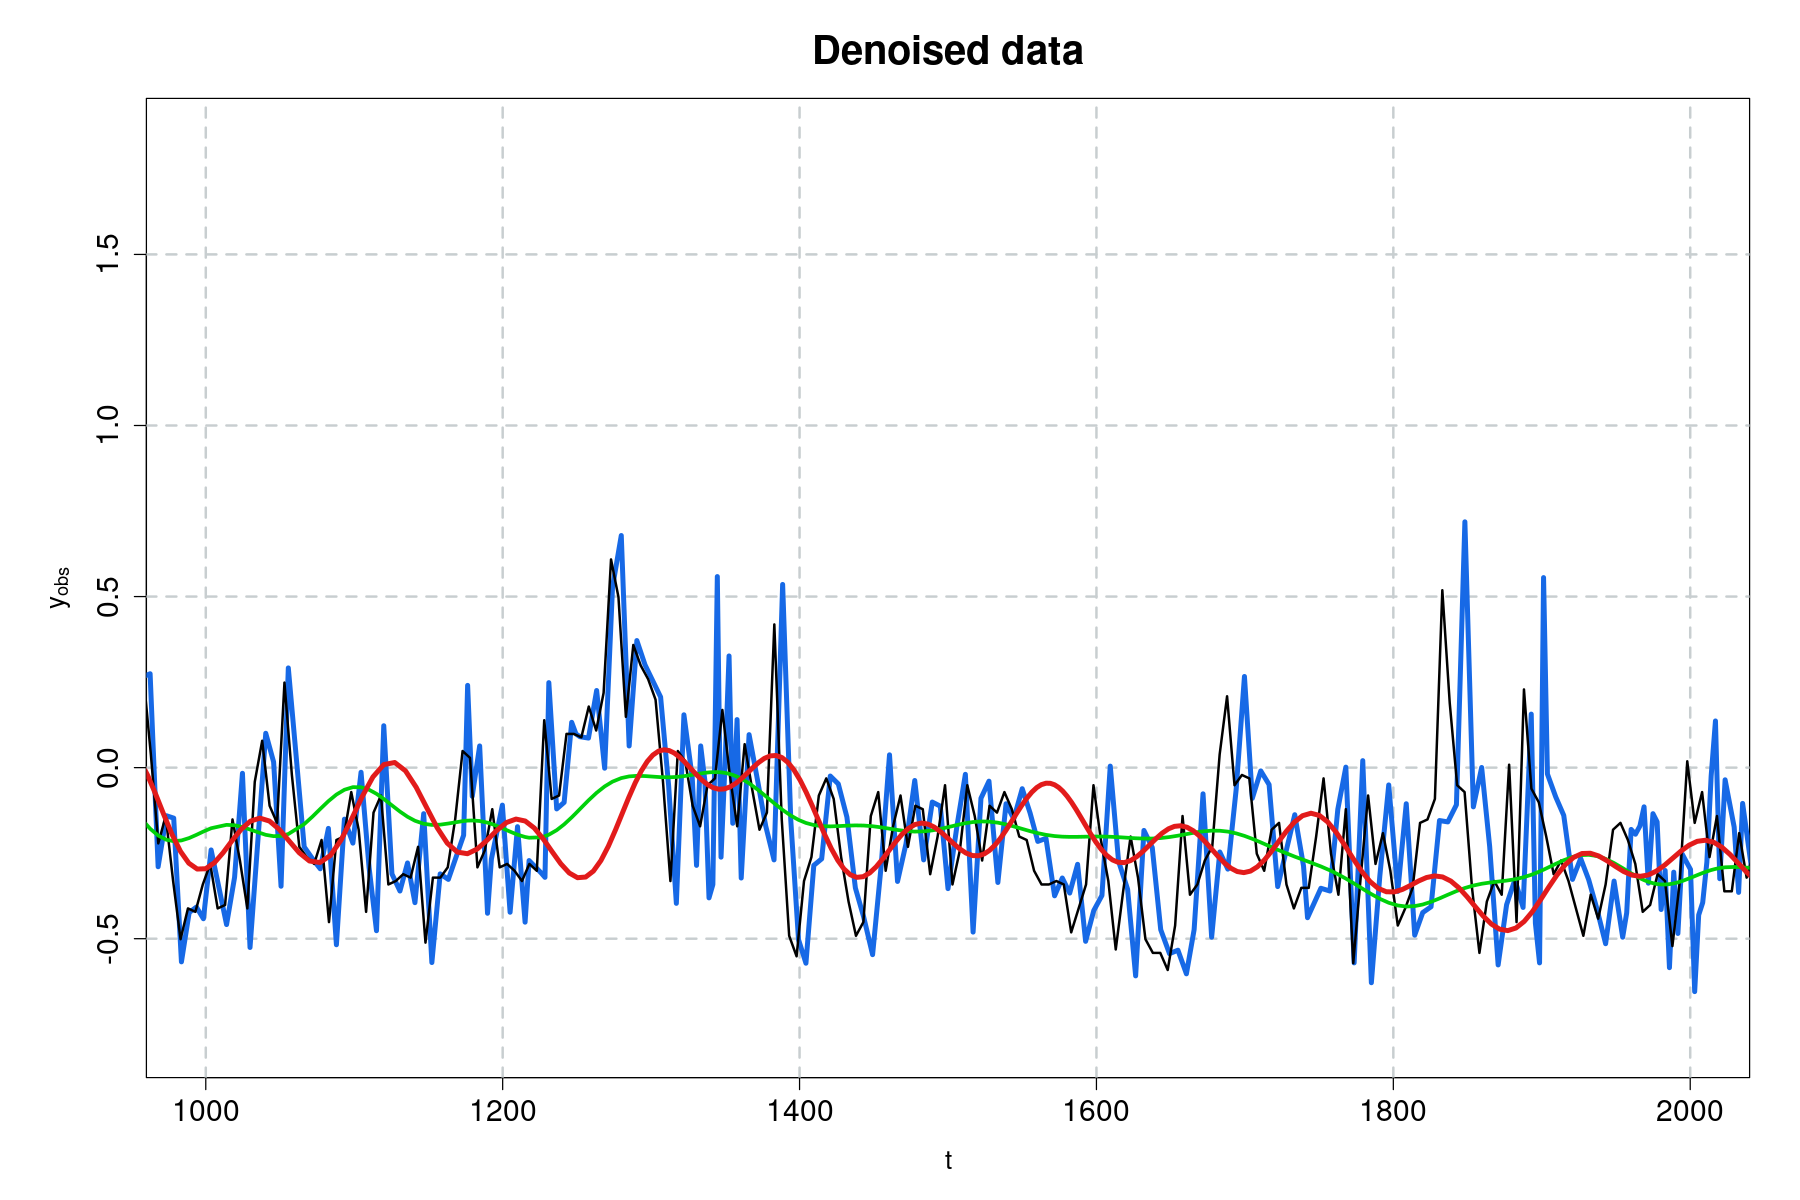

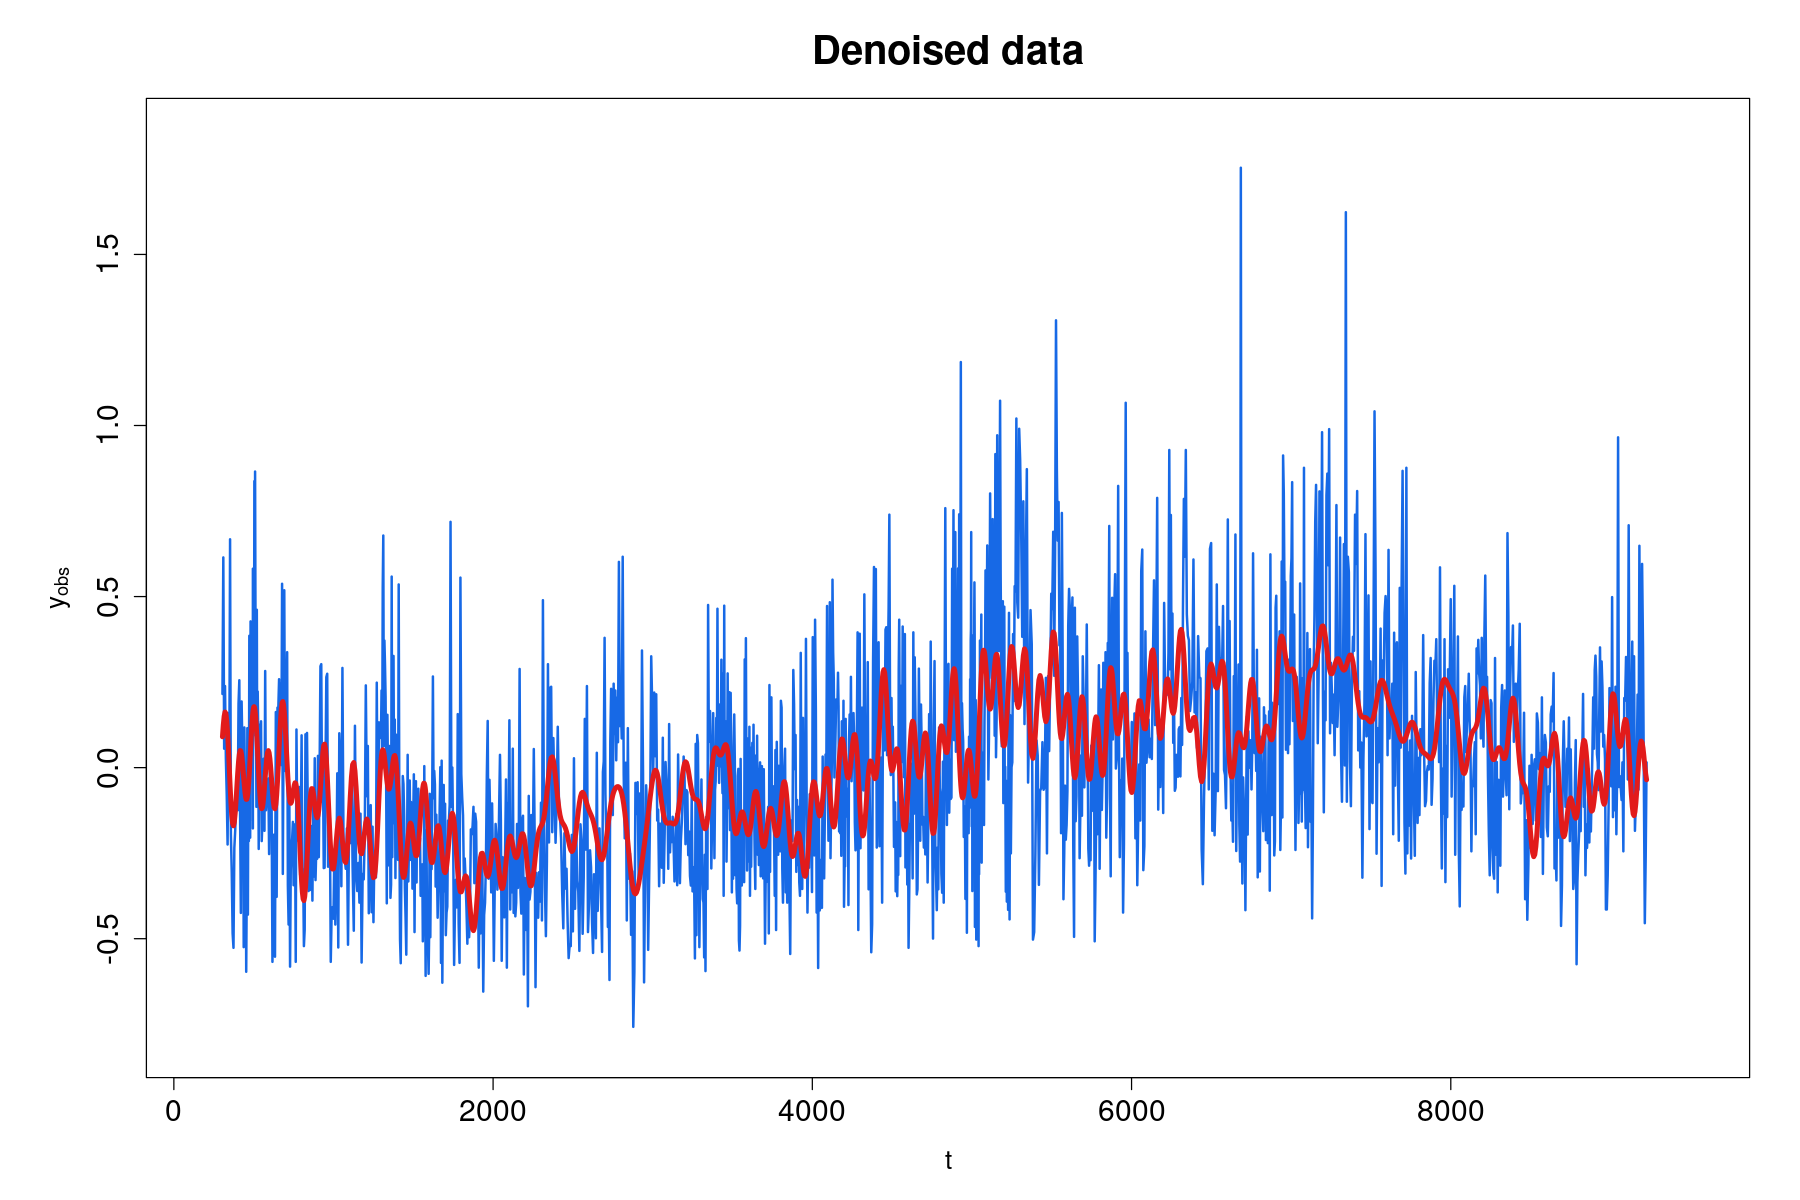

In [295]:
inf_Be <- inference('Series_Be', 'Be_final')

<center>

## Results
<center>

NULL

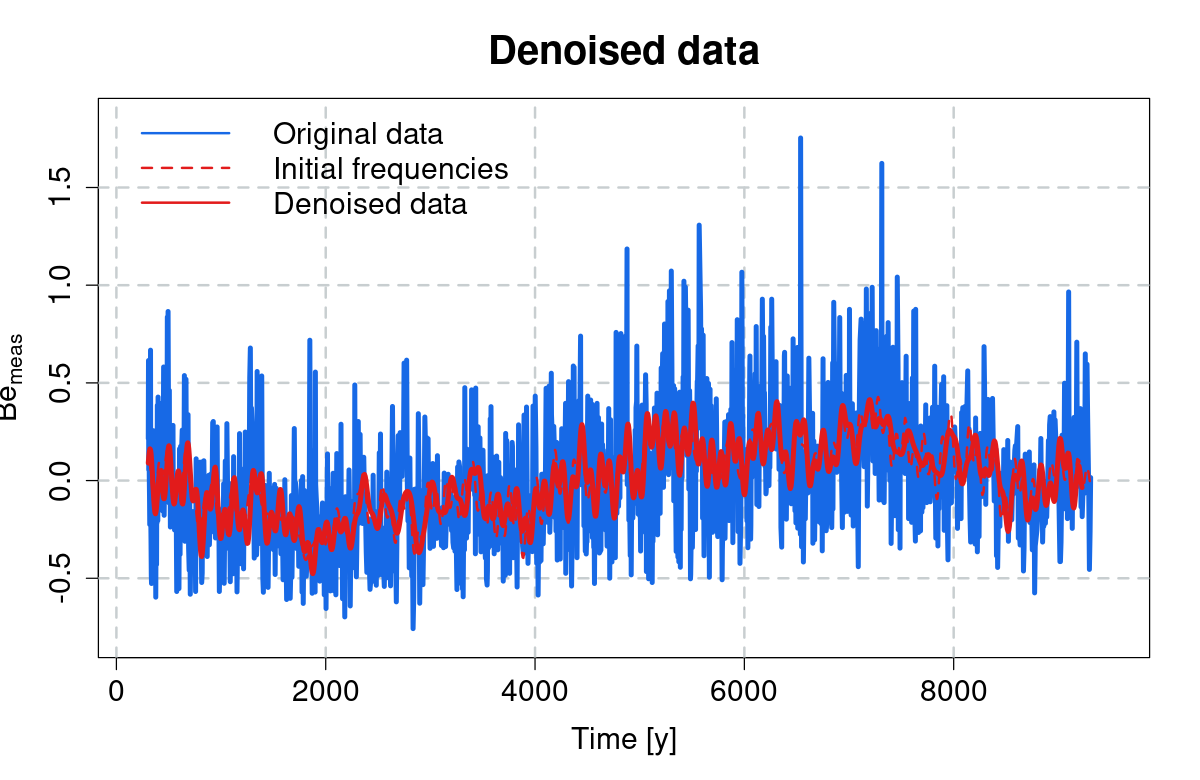

In [314]:
plot_inf(inf_Be$df)

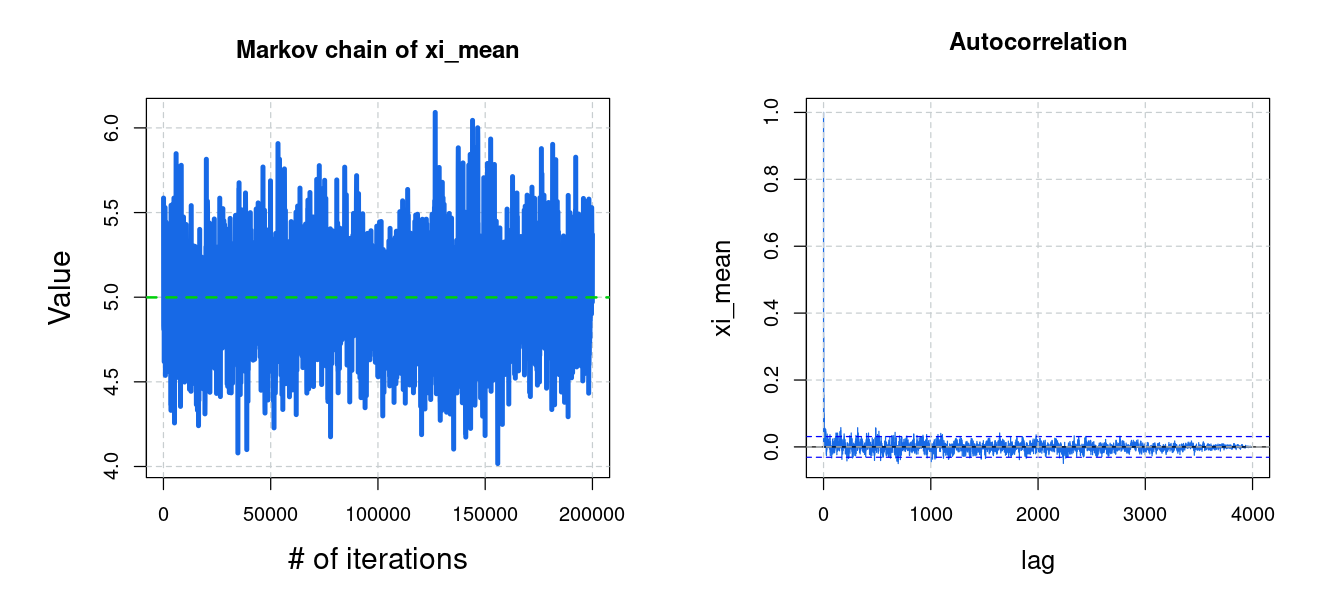

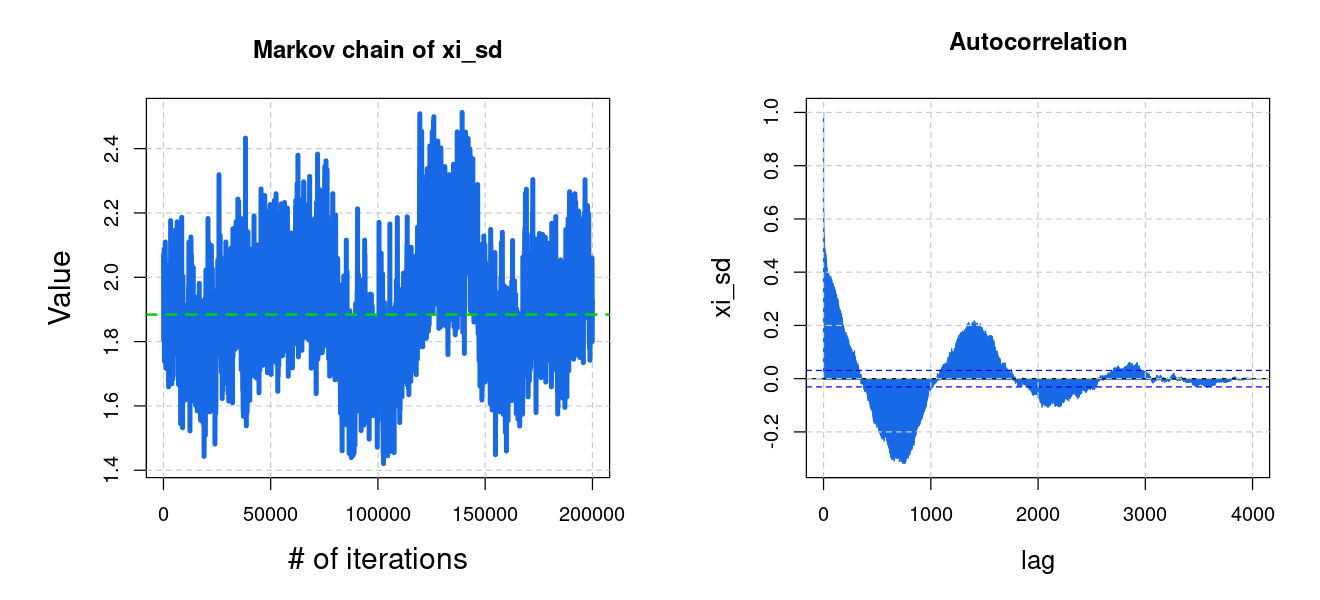

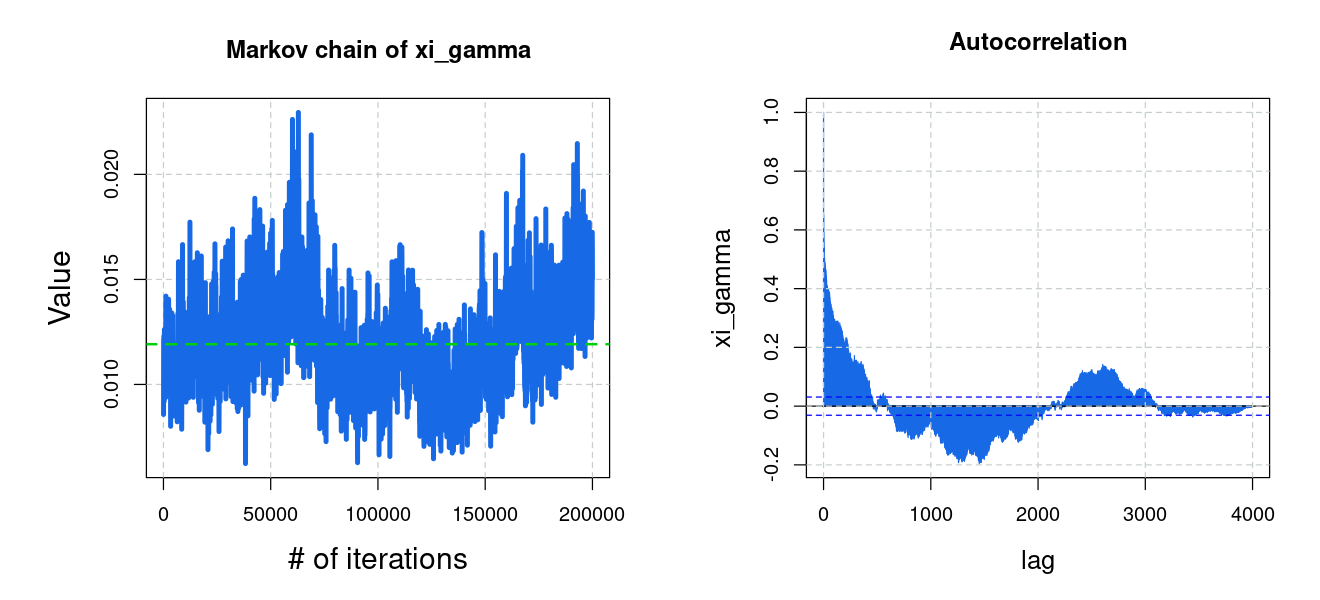

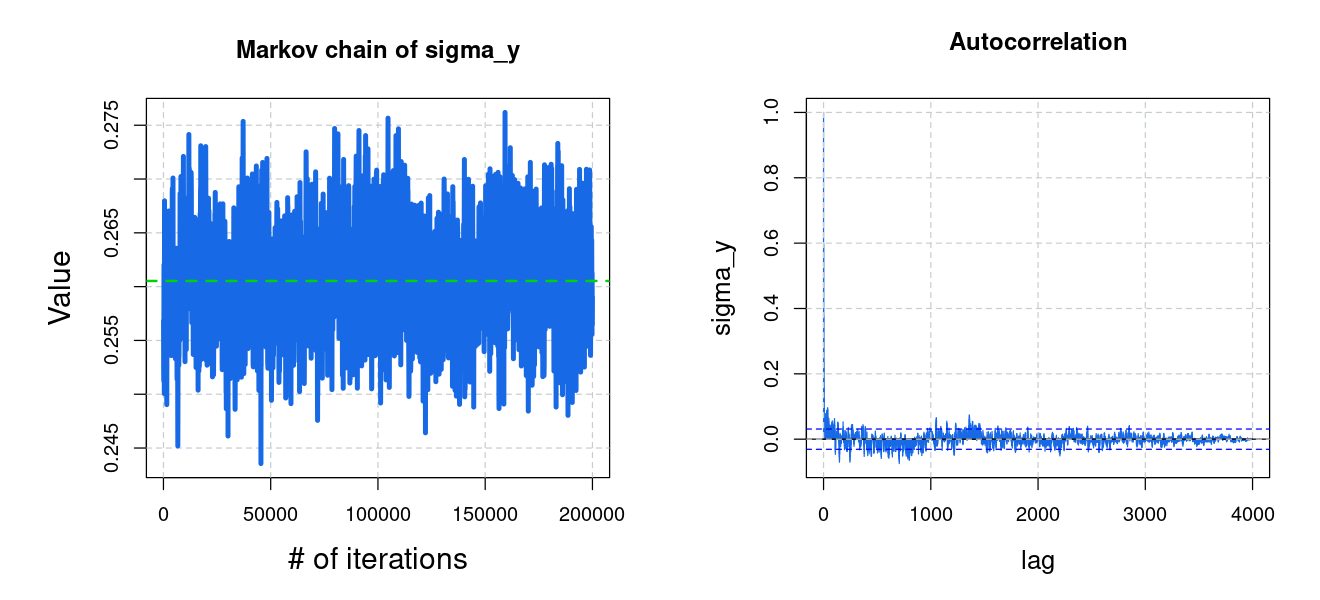

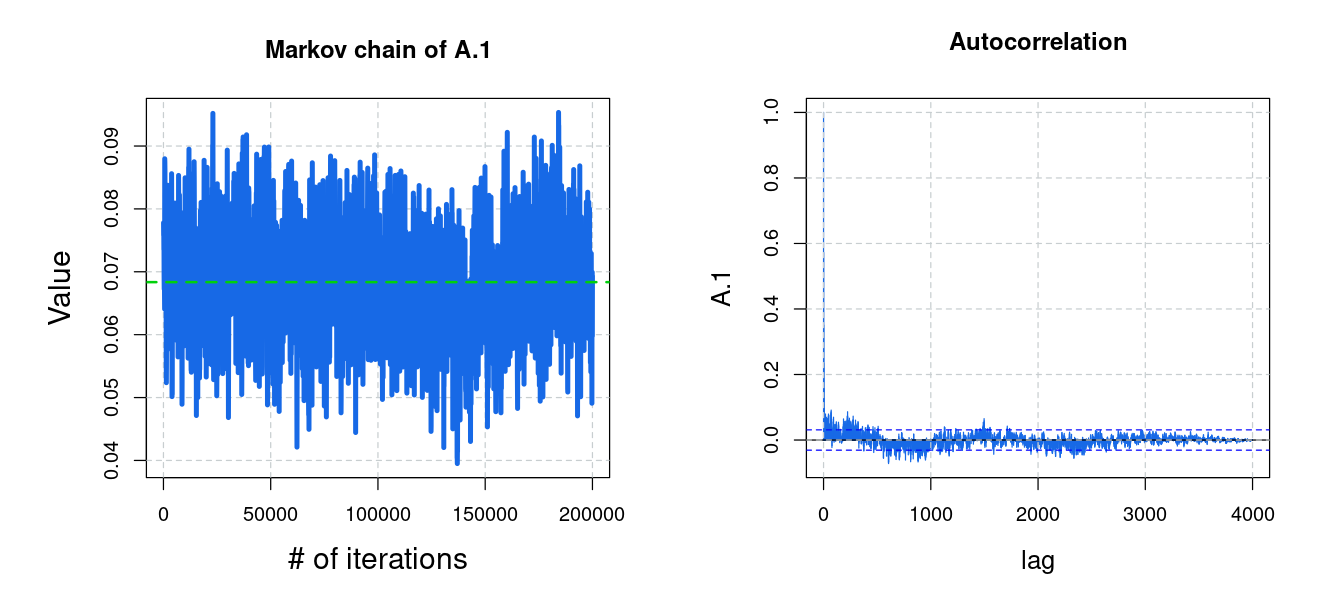

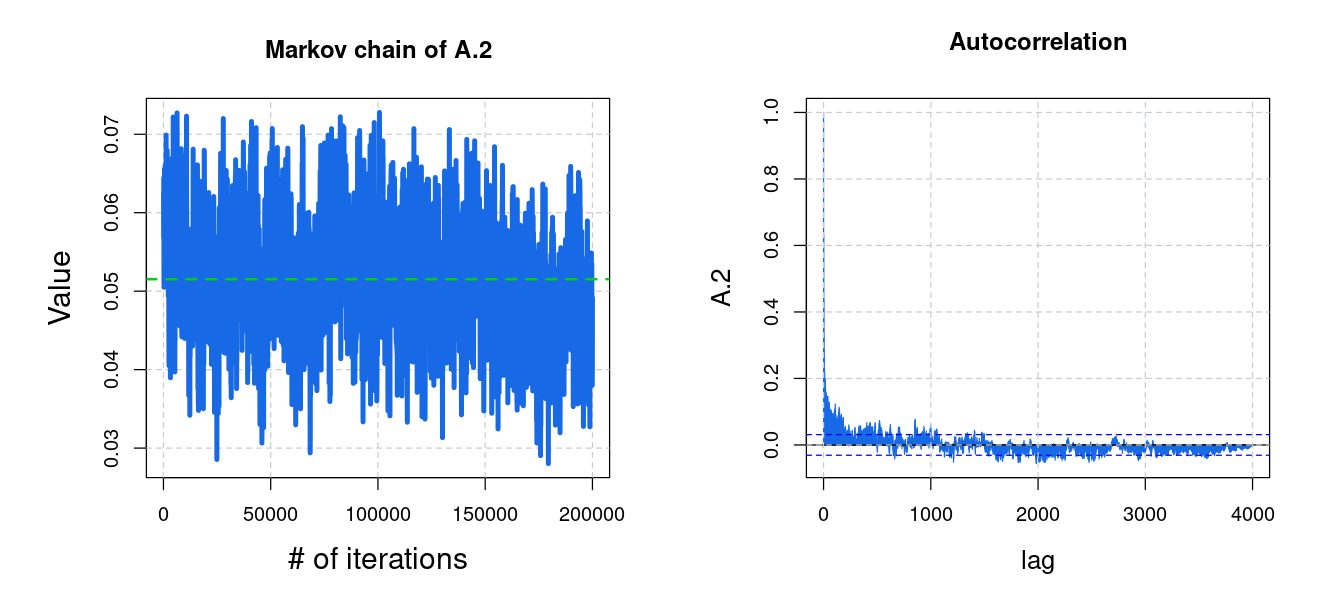

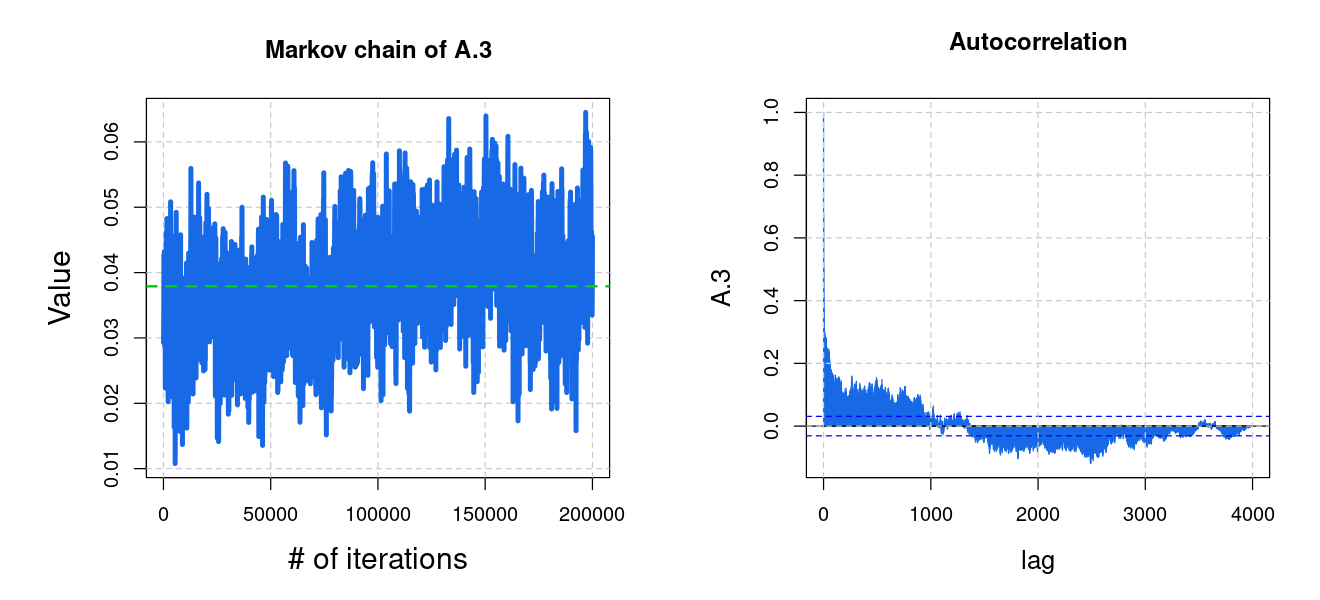

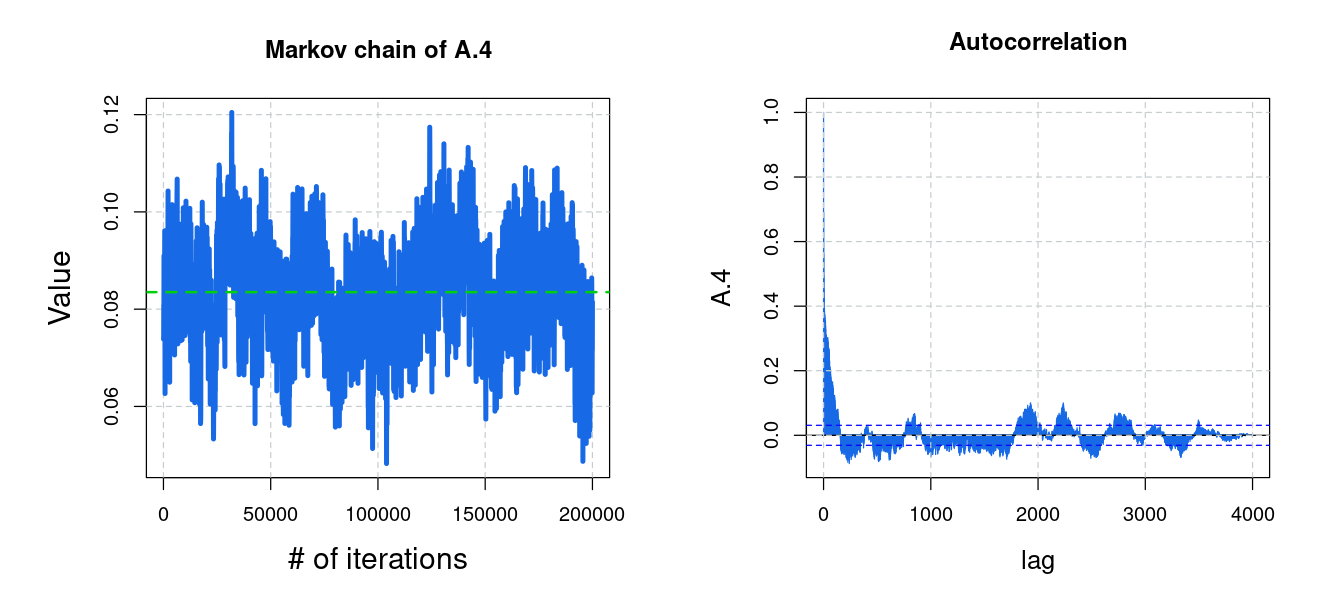

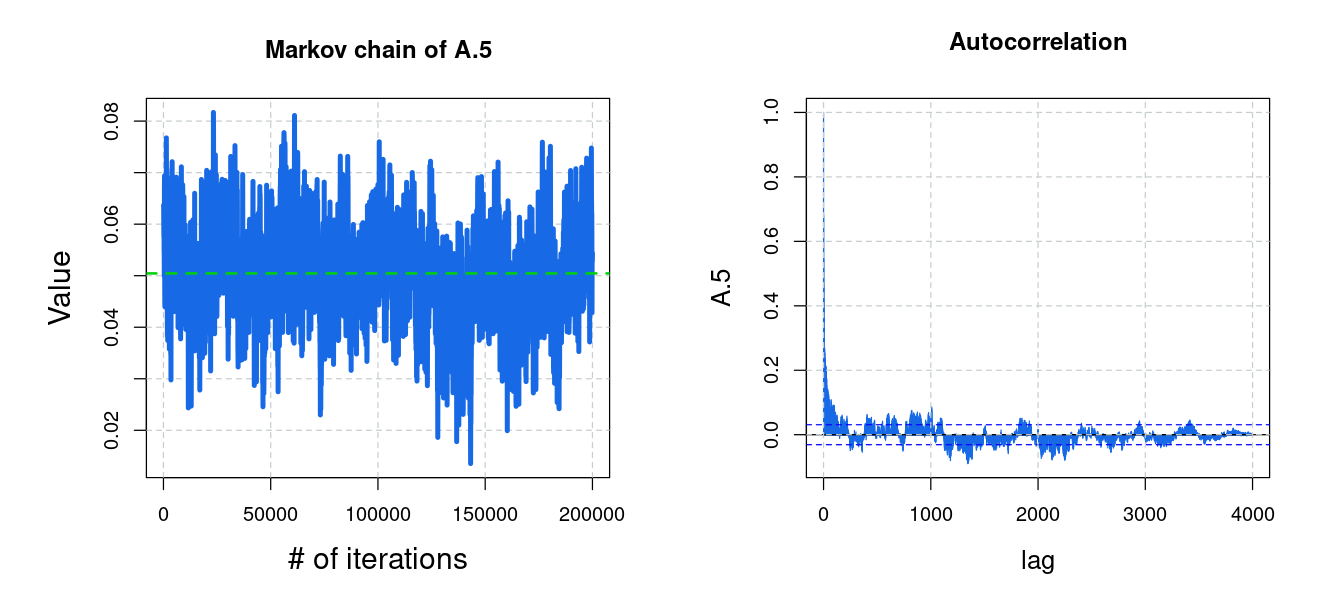

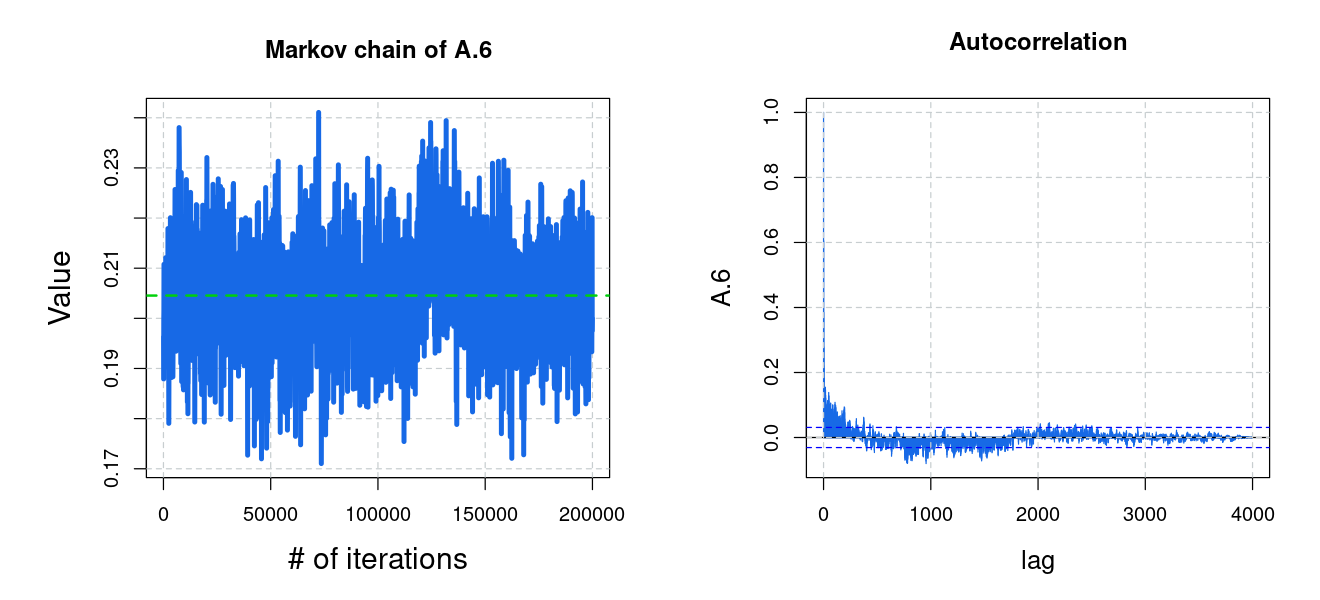

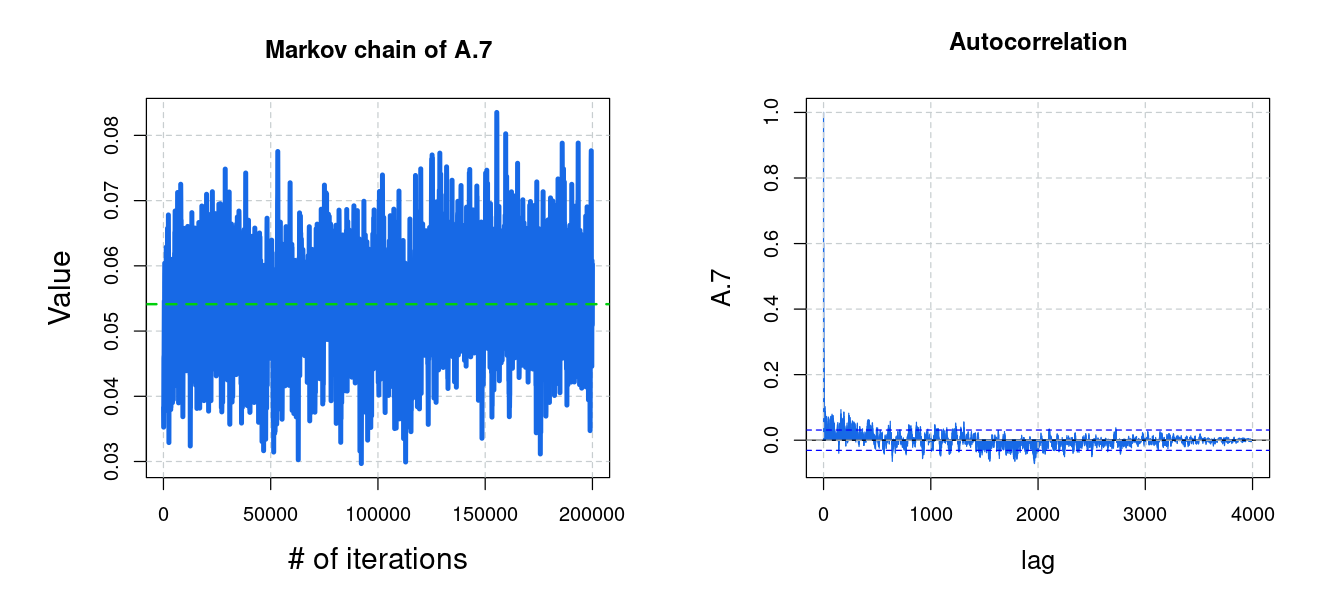

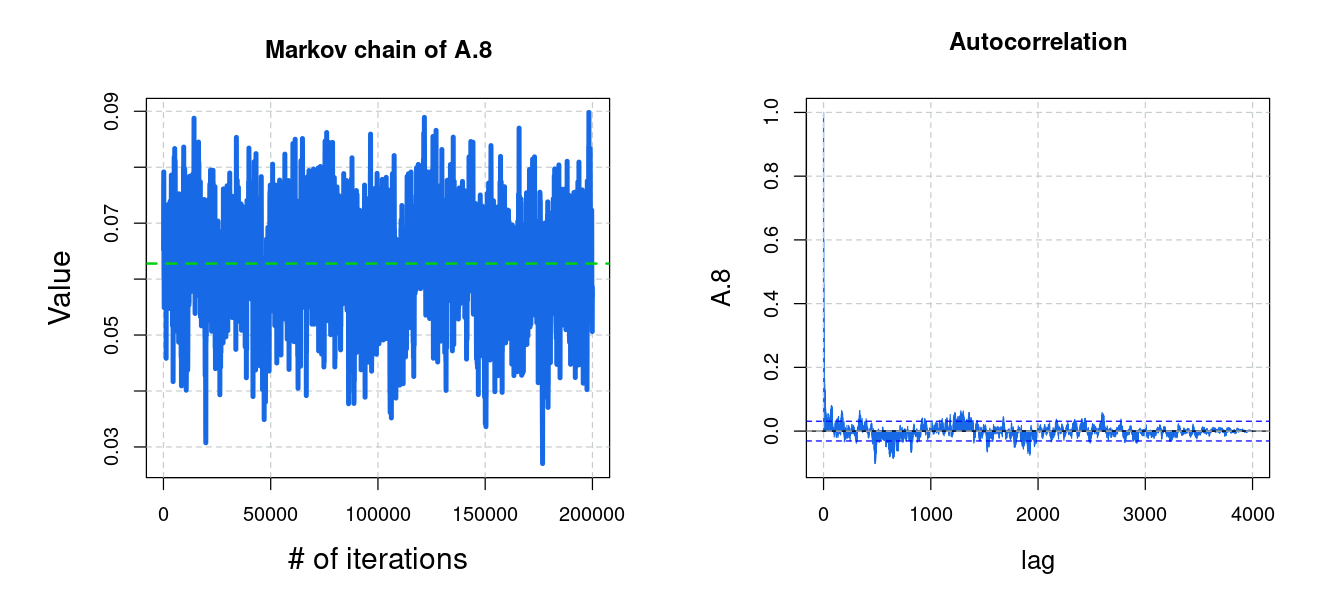

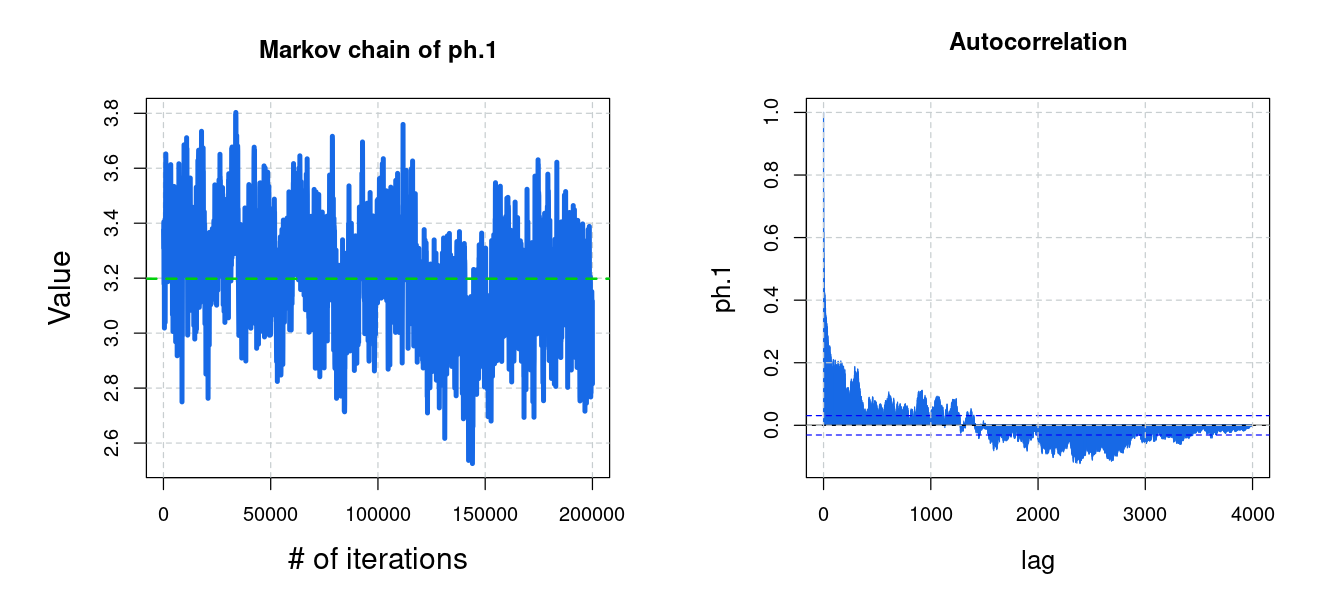

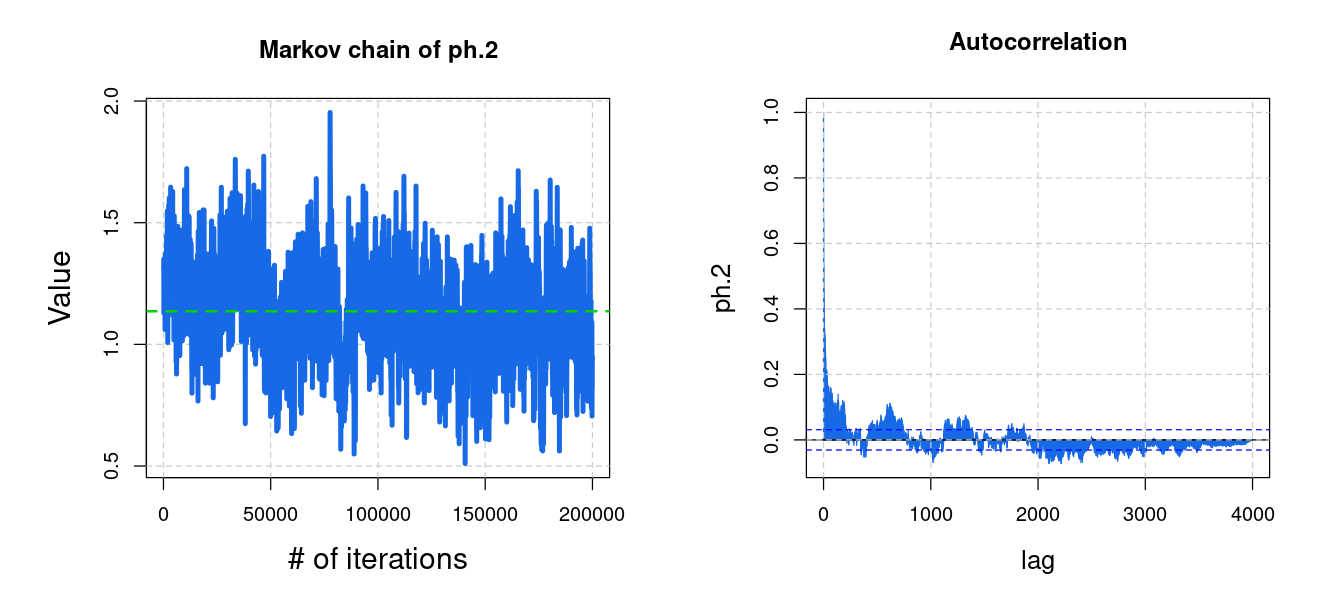

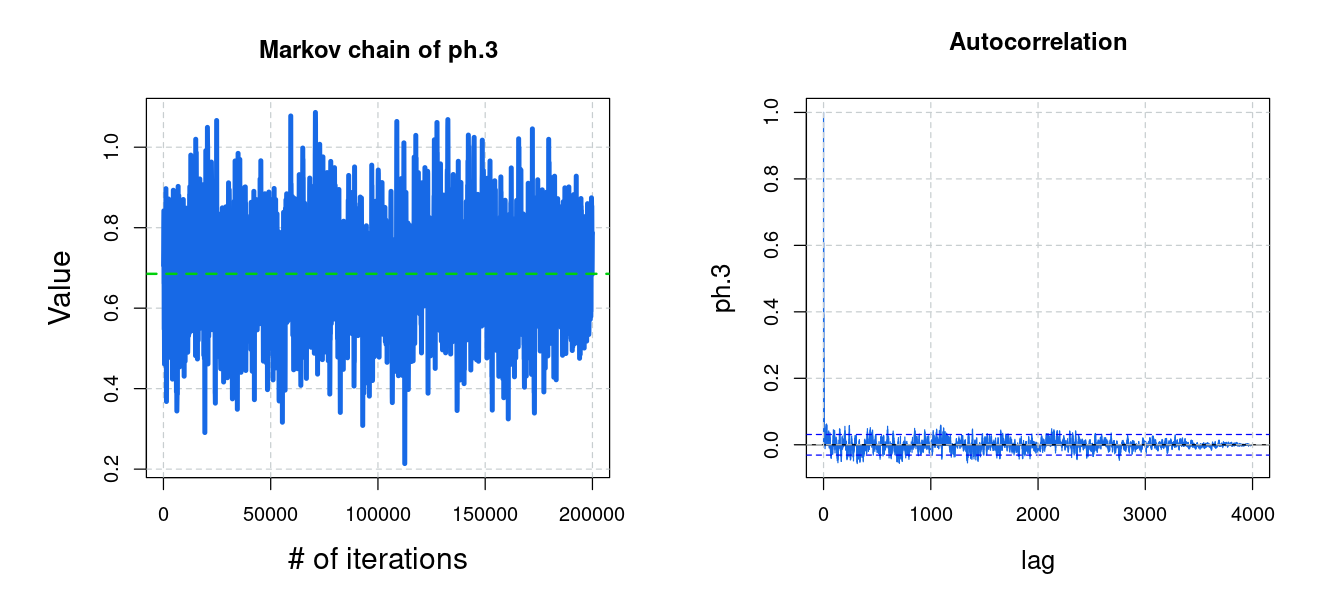

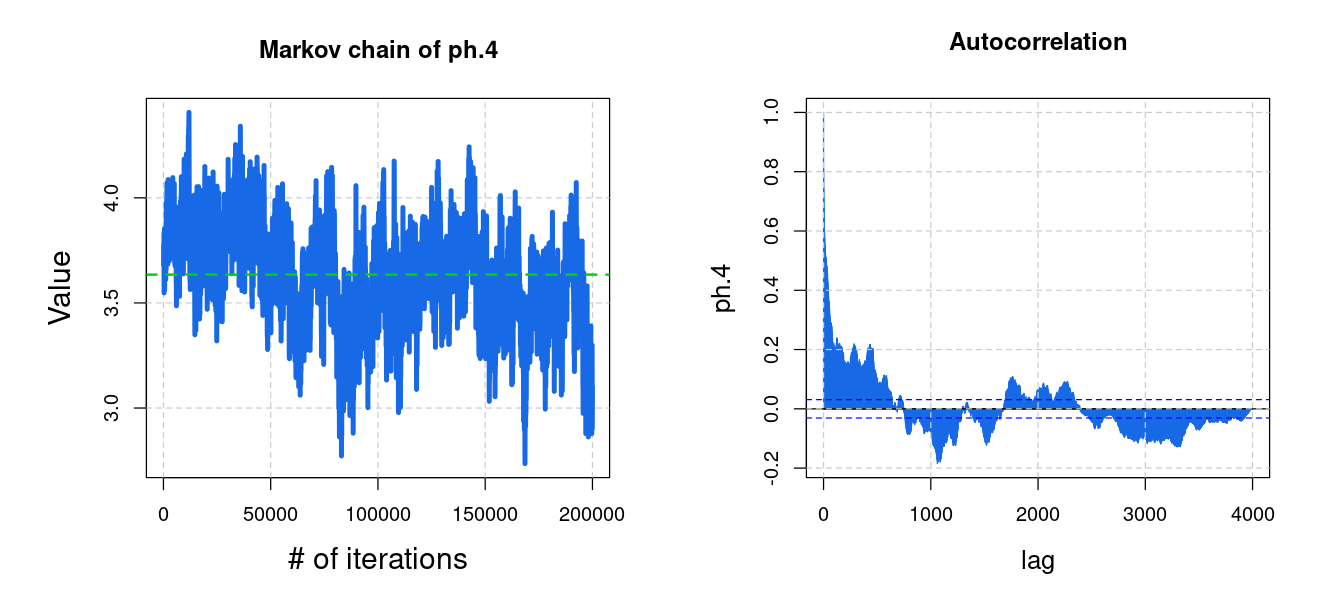

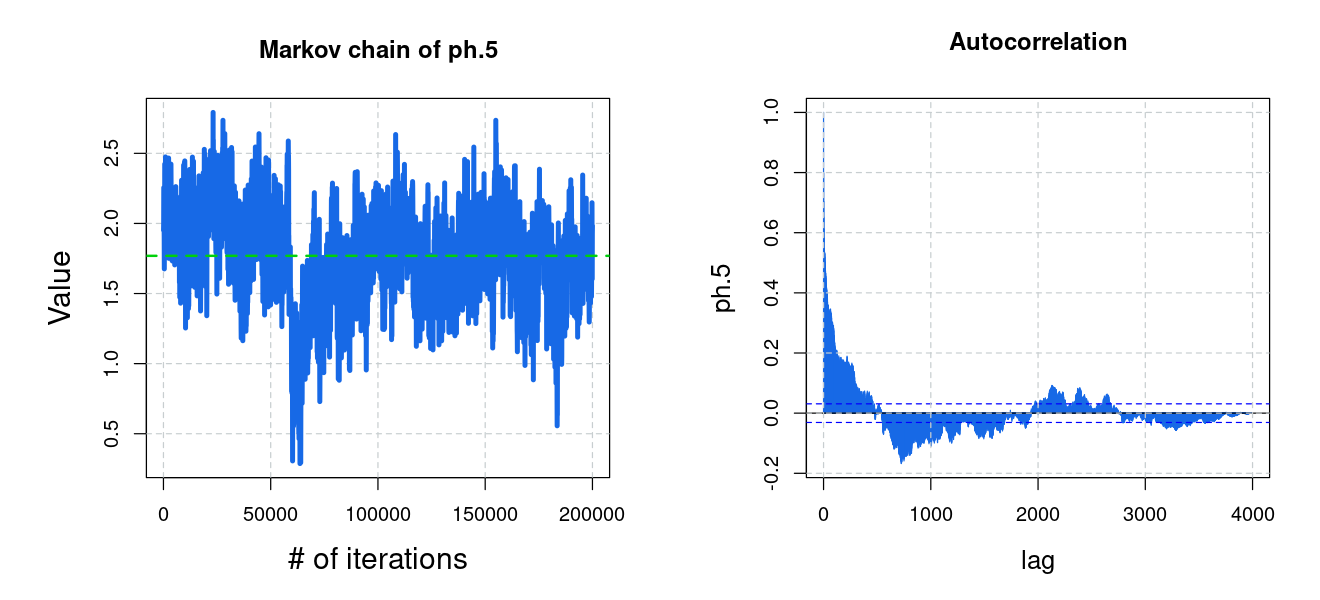

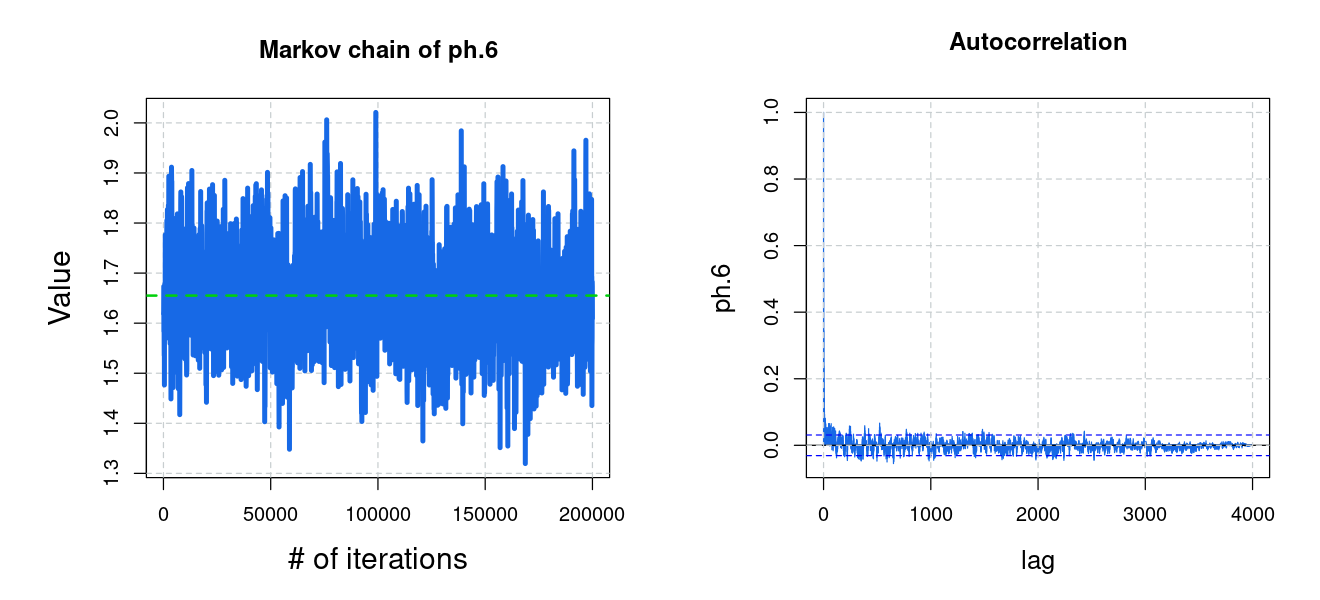

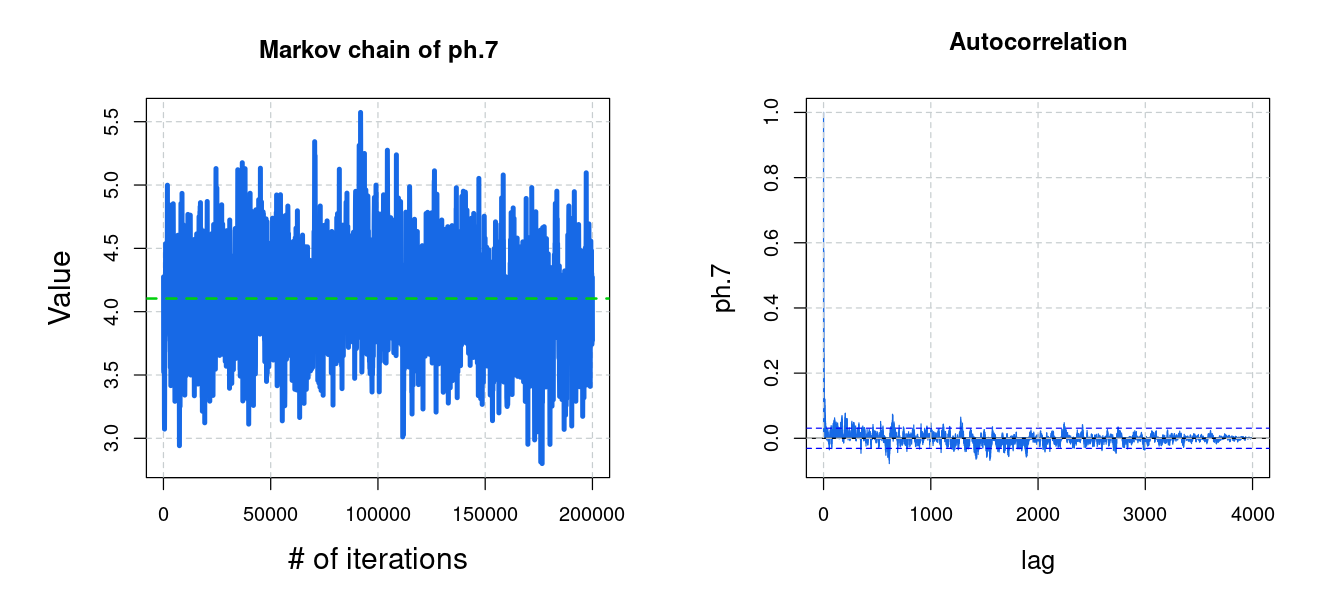

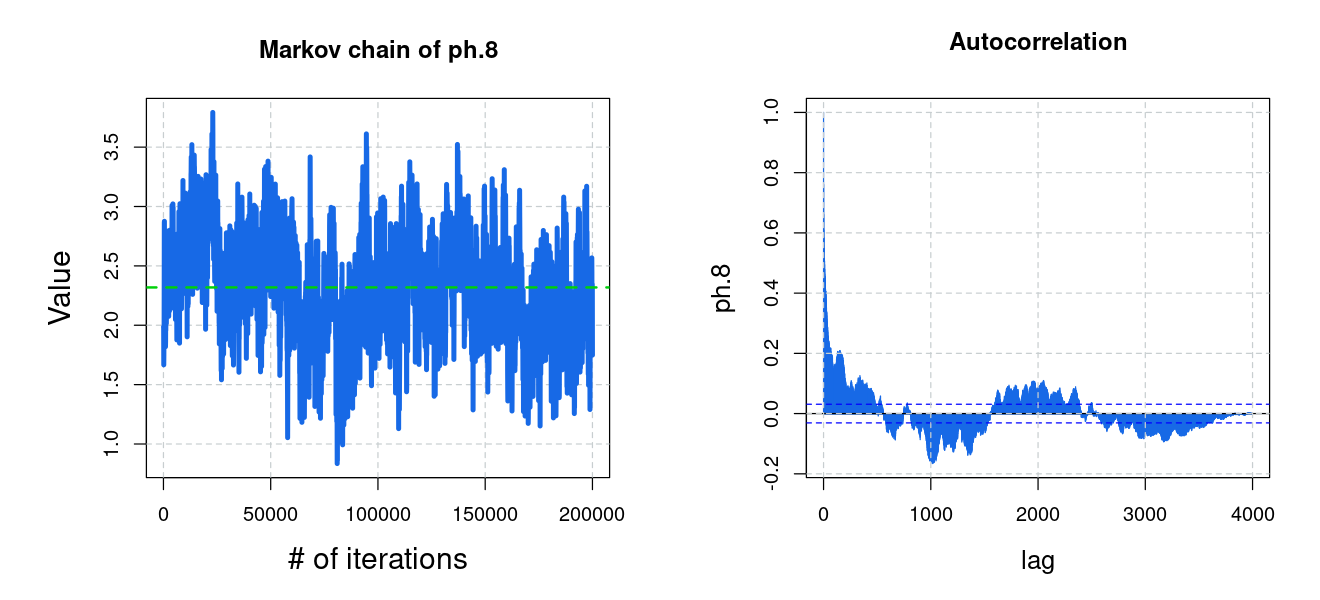

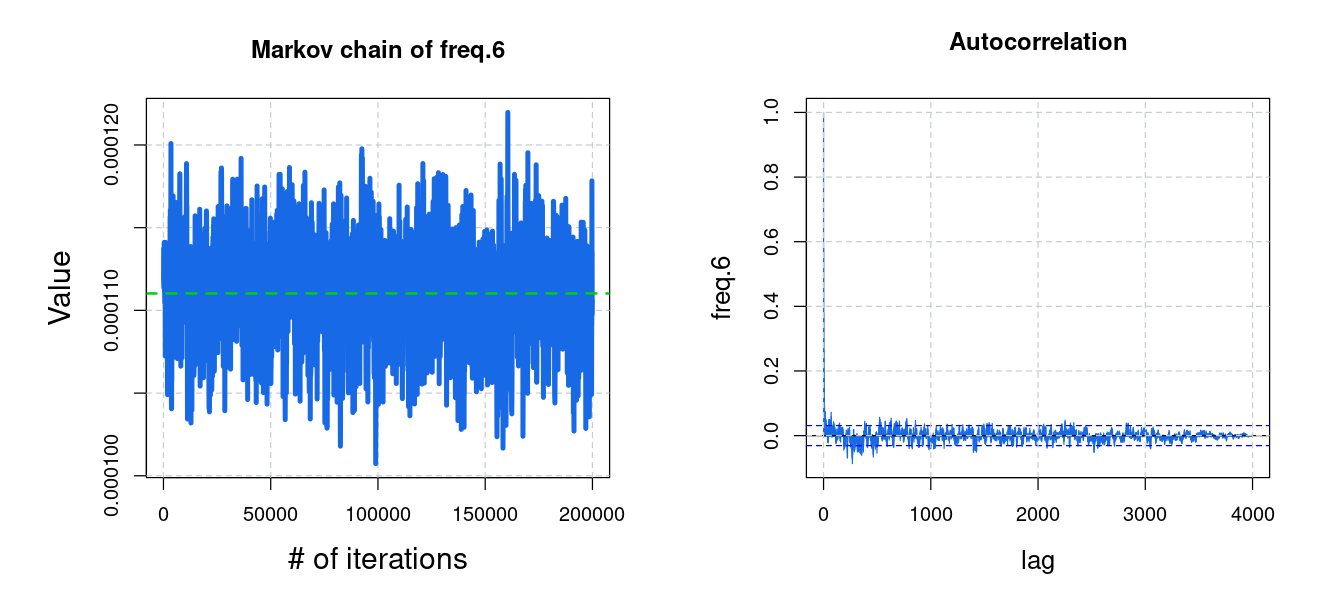

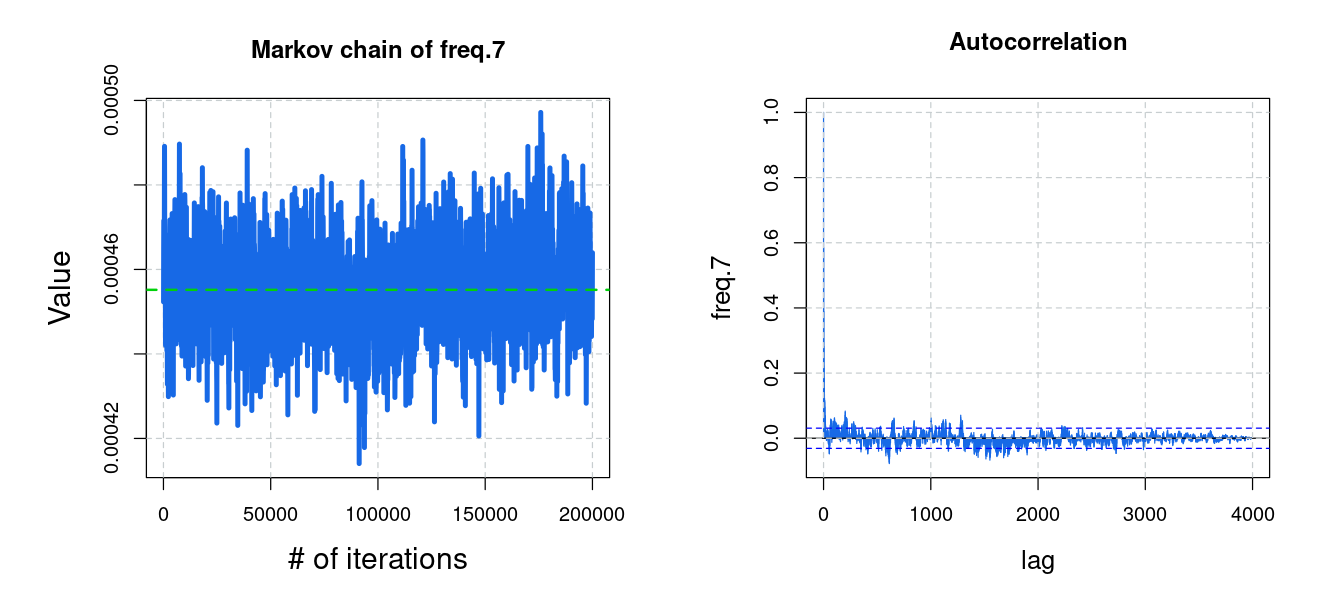

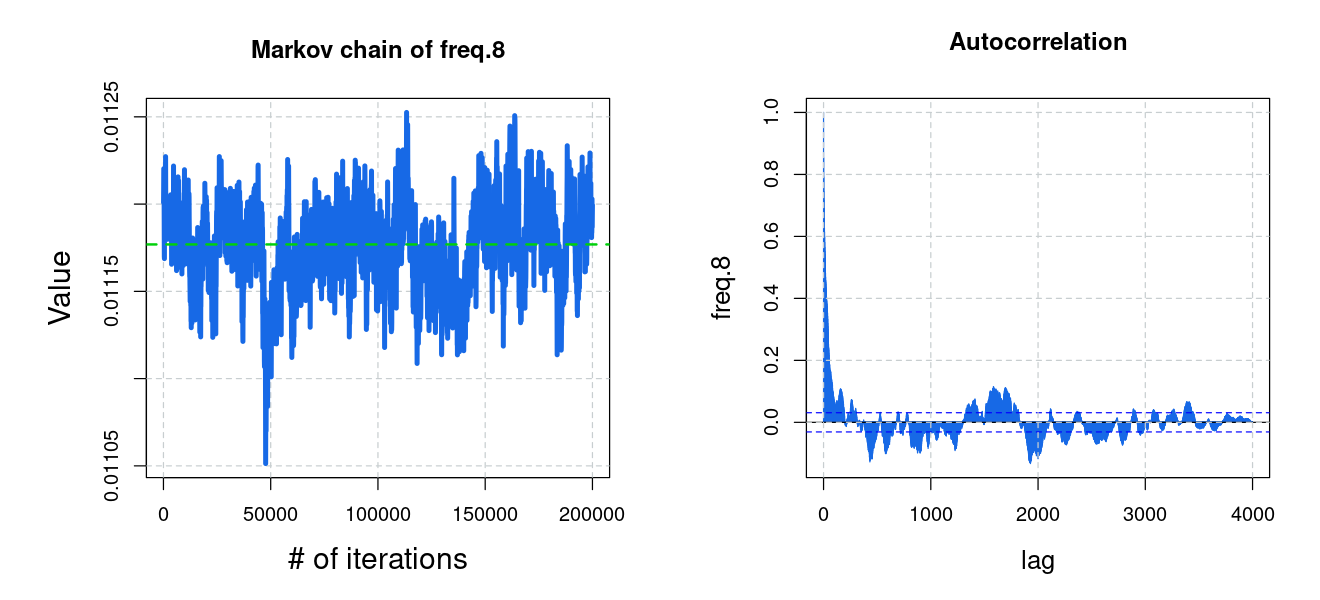

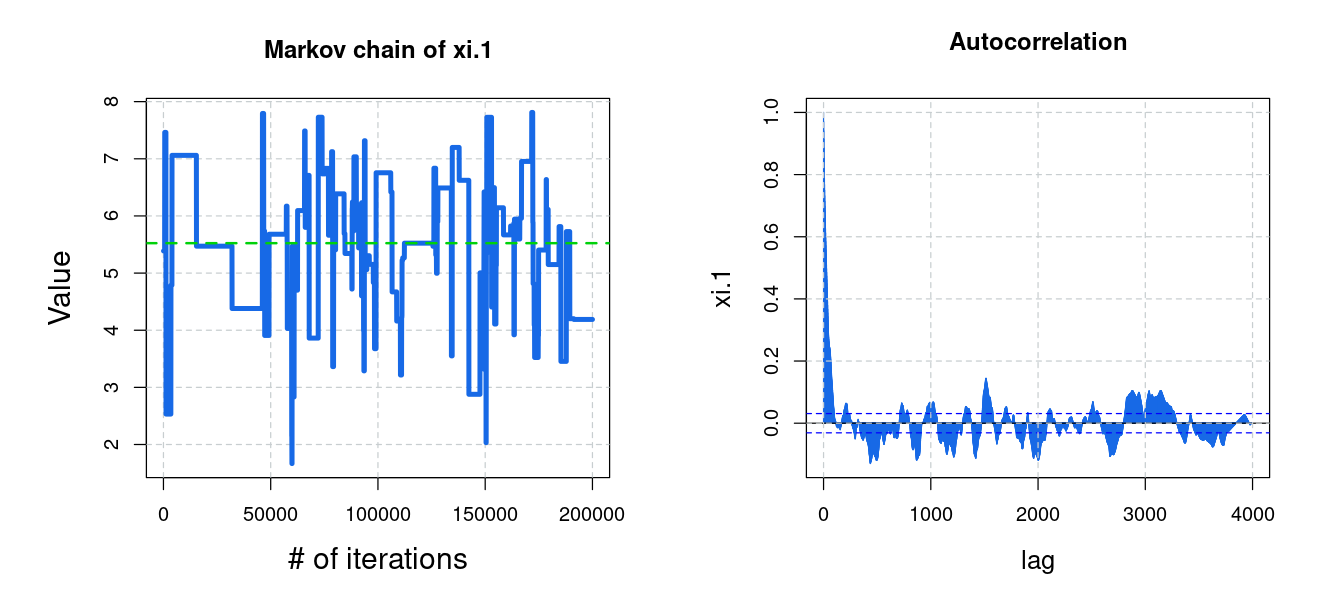

In [315]:
plot_chain_all(inf_Be$df_inf)

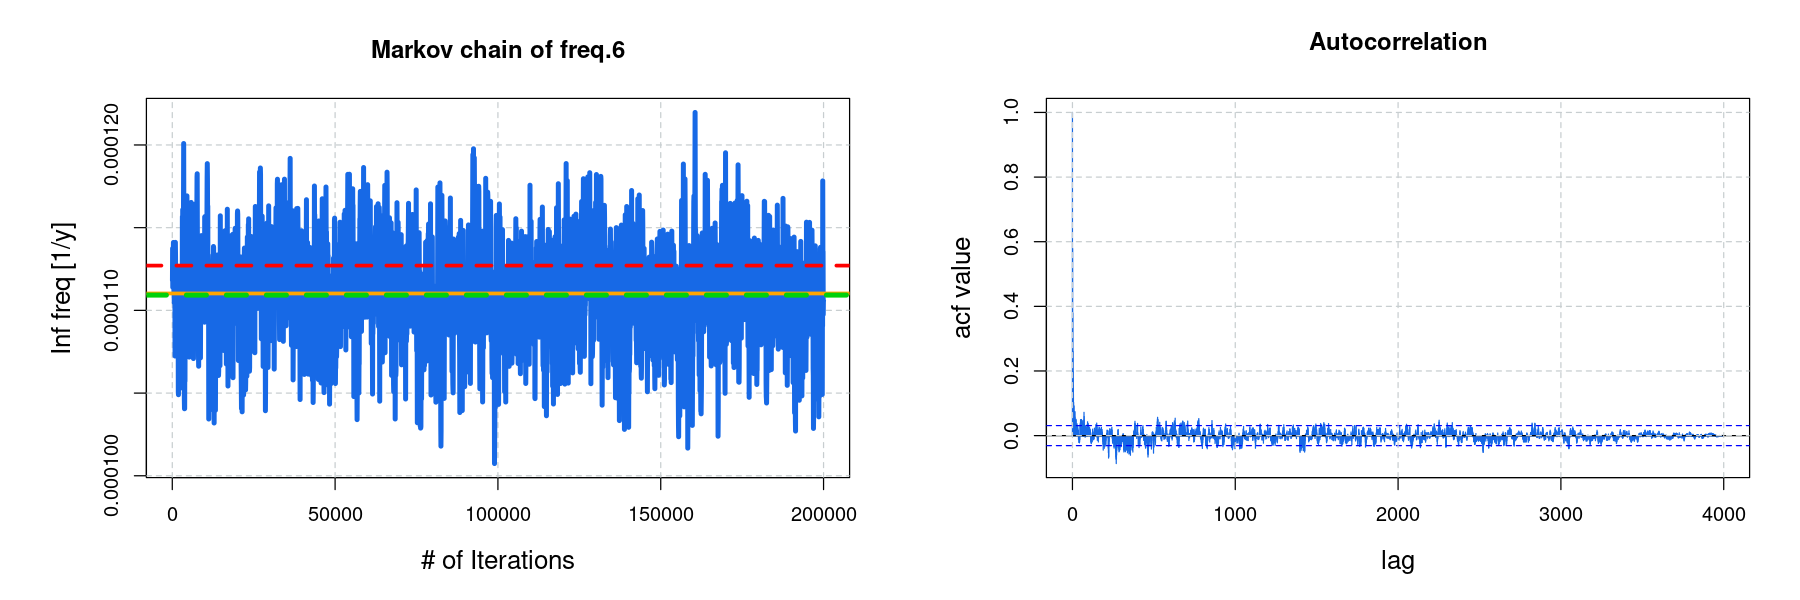

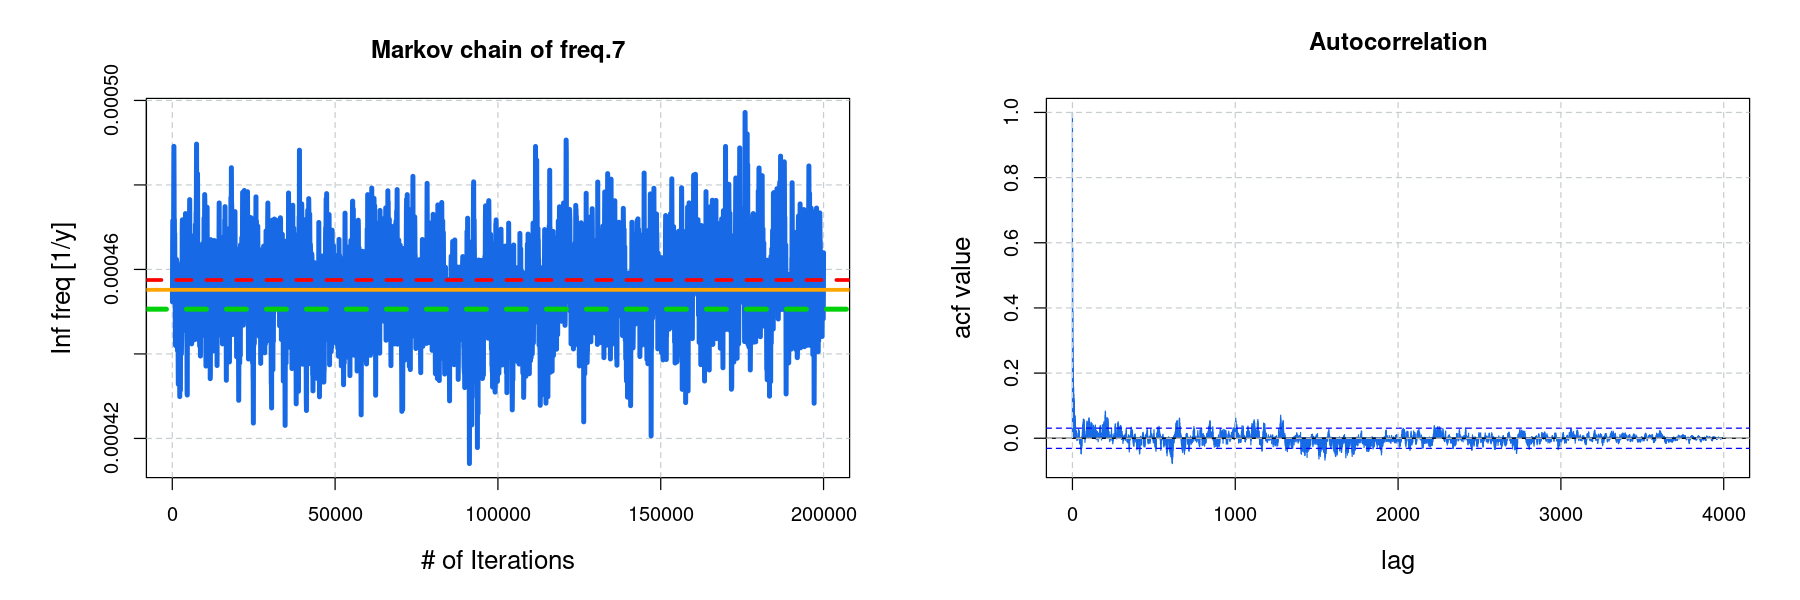

In [316]:
plot_freq(inf_Be$df_inf)

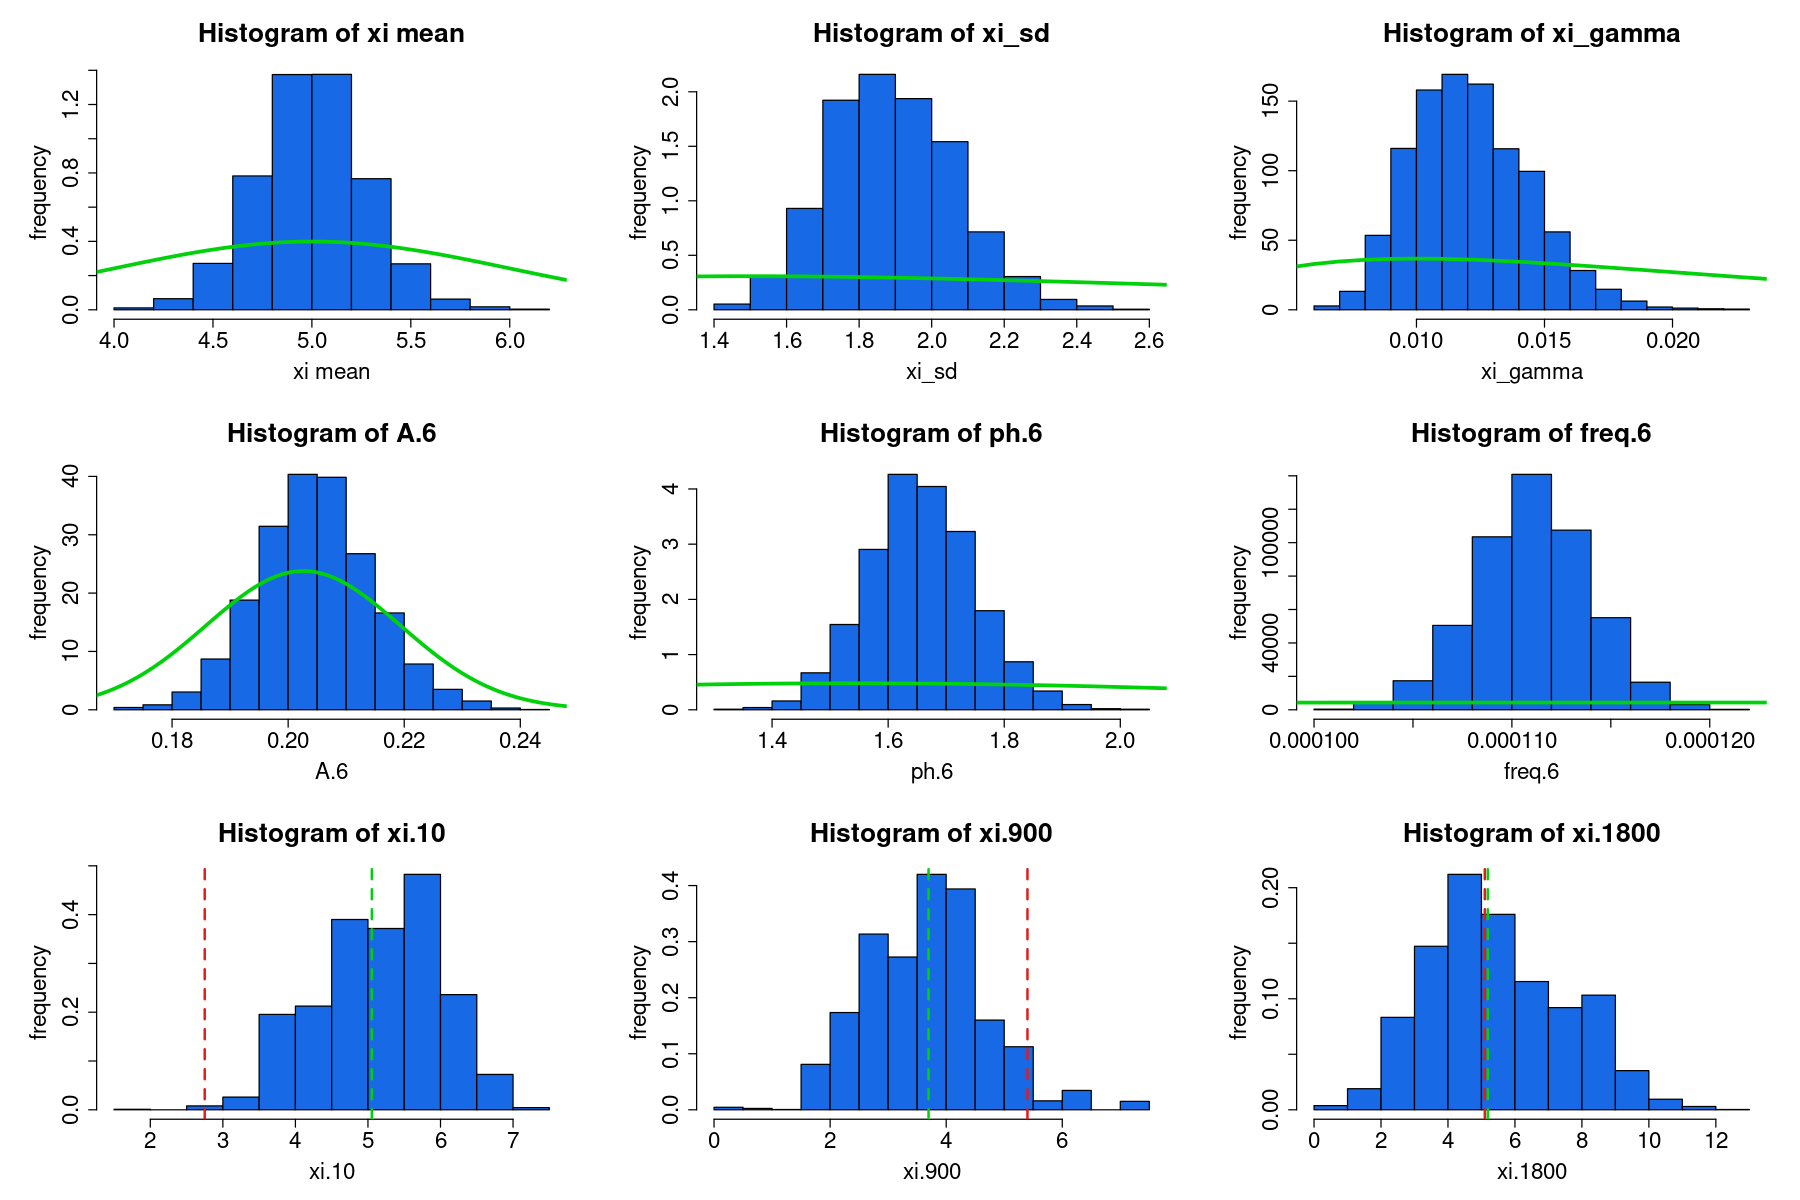

In [321]:
plot_hist(inf_Be)